### imports

In [1]:
import pandas as pd
import math as ma
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as sm1
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import math as ma
from datetime import timedelta
from datetime import datetime
os.chdir("C:/Users/Pedro/BB Data Challenge")

### reading data from file

In [2]:

data = pd.read_csv("publico_formatado.csv", sep=";")
data.drop(columns="ID", inplace=True)

### analysing data

In [3]:
data["PRC"].unique()

array(['D', 'F', 'H', 'J', 'L', 'N', 'A', 'B', 'C', 'E', 'G', 'I', 'M',
       'O', 'K'], dtype=object)

In [4]:
data.groupby("PRC")["RESULTADO"].count()

PRC
A    255
B    251
C    251
D    261
E    250
F    260
G    253
H    253
I    253
J    253
K    235
L    192
M    253
N    258
O    122
Name: RESULTADO, dtype: int64

In [5]:
data

PRC DT_ENTD_PRC  RESULTADO
0      D  01/05/2020         25
1      F  01/05/2020        436
2      H  01/05/2020          1
3      J  01/05/2020          8
4      L  01/05/2020         51
...   ..         ...        ...
3595   J  30/04/2021       1347
3596   K  30/04/2021       1359
3597   M  30/04/2021        622
3598   N  30/04/2021        338
3599   O  30/04/2021        168

[3600 rows x 3 columns]

In [6]:
### Transformando o tipo da coluna DT de string para datetime

In [7]:
data.columns=['PRC', 'DT_STRG', 'RESULTADO']
data["DATA"] = pd.to_datetime(data.DT_STRG, format="%d/%m/%Y")

data.drop(columns="DT_STRG", inplace=True)
data.columns=['PRC', 'RESULTADO','DT_ENTD_PRC']

data

PRC  RESULTADO DT_ENTD_PRC
0      D         25  2020-05-01
1      F        436  2020-05-01
2      H          1  2020-05-01
3      J          8  2020-05-01
4      L         51  2020-05-01
...   ..        ...         ...
3595   J       1347  2021-04-30
3596   K       1359  2021-04-30
3597   M        622  2021-04-30
3598   N        338  2021-04-30
3599   O        168  2021-04-30

[3600 rows x 3 columns]

In [8]:
data.head(40)

PRC  RESULTADO DT_ENTD_PRC
0    D         25  2020-05-01
1    F        436  2020-05-01
2    H          1  2020-05-01
3    J          8  2020-05-01
4    L         51  2020-05-01
5    N          2  2020-05-01
6    A        464  2020-05-04
7    B        522  2020-05-04
8    C        302  2020-05-04
9    D        315  2020-05-04
10   E        306  2020-05-04
11   F         23  2020-05-04
12   G        523  2020-05-04
13   H        194  2020-05-04
14   I        228  2020-05-04
15   J        827  2020-05-04
16   L       2412  2020-05-04
17   M        270  2020-05-04
18   N        137  2020-05-04
19   A        444  2020-05-05
20   B        449  2020-05-05
21   C        344  2020-05-05
22   D        219  2020-05-05
23   E        360  2020-05-05
24   F        452  2020-05-05
25   G        527  2020-05-05
26   H        222  2020-05-05
27   I        371  2020-05-05
28   J        777  2020-05-05
29   L        243  2020-05-05
30   M        416  2020-05-05
31   N        192  2020-05-05
32   A        470  2020-05-06
33   B        474  2020-05-06
34   C        386  2020-05-06
35   D        237  2020-05-06
36   E        320  2020-05-06
37   F        500  2020-05-06
38   G        524  2020-05-06
39   H        258  2020-05-06

In [9]:
datas = [data.DT_ENTD_PRC.min() + timedelta(days=x) for x in range((data.DT_ENTD_PRC.max()-data.DT_ENTD_PRC.min()).days + 1)]
datas = pd.DataFrame(datas)
datas.columns = ["DT_ENTD_PRC"]
datas
df_aux = pd.DataFrame()
for processo in data.PRC.unique():
    teste = data[data.PRC == processo]
    teste = datas.merge(teste, how="left", on="DT_ENTD_PRC")
    teste.PRC = processo
    df_aux = df_aux.append(teste)

df_aux.RESULTADO = df_aux.RESULTADO.fillna(0)
df_aux = df_aux.sort_values(by="DT_ENTD_PRC")


In [10]:
datas

DT_ENTD_PRC
0    2020-05-01
1    2020-05-02
2    2020-05-03
3    2020-05-04
4    2020-05-05
..          ...
360  2021-04-26
361  2021-04-27
362  2021-04-28
363  2021-04-29
364  2021-04-30

[365 rows x 1 columns]

In [11]:
df_aux["DayOfWeek"]=df_aux.DT_ENTD_PRC.apply(lambda x :x.weekday())
df_aux

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0    2020-05-01   D       25.0          4
0    2020-05-01   G        0.0          4
0    2020-05-01   J        8.0          4
0    2020-05-01   F      436.0          4
0    2020-05-01   K        0.0          4
..          ...  ..        ...        ...
364  2021-04-30   I      178.0          4
364  2021-04-30   H      241.0          4
364  2021-04-30   D      237.0          4
364  2021-04-30   J     1347.0          4
364  2021-04-30   K     1359.0          4

[5475 rows x 4 columns]

In [12]:
df_aux.head(30)

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   D       25.0          4
0  2020-05-01   G        0.0          4
0  2020-05-01   J        8.0          4
0  2020-05-01   F      436.0          4
0  2020-05-01   K        0.0          4
0  2020-05-01   M        0.0          4
0  2020-05-01   N        2.0          4
0  2020-05-01   L       51.0          4
0  2020-05-01   O        0.0          4
0  2020-05-01   I        0.0          4
0  2020-05-01   B        0.0          4
0  2020-05-01   A        0.0          4
0  2020-05-01   C        0.0          4
0  2020-05-01   E        0.0          4
0  2020-05-01   H        1.0          4
1  2020-05-02   H        0.0          5
1  2020-05-02   G        0.0          5
1  2020-05-02   J        0.0          5
1  2020-05-02   F        0.0          5
1  2020-05-02   E        0.0          5
1  2020-05-02   K        0.0          5
1  2020-05-02   M        0.0          5
1  2020-05-02   I        0.0          5
1  2020-05-02   A        0.0          5
1  2020-05-02   O        0.0          5
1  2020-05-02   C        0.0          5
1  2020-05-02   N        0.0          5
1  2020-05-02   L        0.0          5
1  2020-05-02   B        0.0          5
1  2020-05-02   D        0.0          5

### Process A

In [13]:
dataA=df_aux[df_aux.PRC=="A"]

In [14]:
dataA.set_index("DT_ENTD_PRC", inplace=True)


In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(dataA["RESULTADO"])


ADF Test Statistic : -2.036083096296969
p-value : 0.2709793704419249
#Lags Used : 16
Number of Observations Used : 348
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [17]:

dataA['Result First Difference'] = dataA['RESULTADO'] - dataA['RESULTADO'].shift(7)
adfuller_test(dataA['Result First Difference'].dropna())

ADF Test Statistic : -4.849218486292122
p-value : 4.3744515517419985e-05
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DT_ENTD_PRC'>

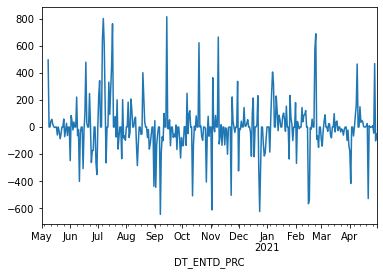

In [18]:
dataA['Result First Difference'].plot()

In [19]:
data.head(30)

PRC  RESULTADO DT_ENTD_PRC
0    D         25  2020-05-01
1    F        436  2020-05-01
2    H          1  2020-05-01
3    J          8  2020-05-01
4    L         51  2020-05-01
5    N          2  2020-05-01
6    A        464  2020-05-04
7    B        522  2020-05-04
8    C        302  2020-05-04
9    D        315  2020-05-04
10   E        306  2020-05-04
11   F         23  2020-05-04
12   G        523  2020-05-04
13   H        194  2020-05-04
14   I        228  2020-05-04
15   J        827  2020-05-04
16   L       2412  2020-05-04
17   M        270  2020-05-04
18   N        137  2020-05-04
19   A        444  2020-05-05
20   B        449  2020-05-05
21   C        344  2020-05-05
22   D        219  2020-05-05
23   E        360  2020-05-05
24   F        452  2020-05-05
25   G        527  2020-05-05
26   H        222  2020-05-05
27   I        371  2020-05-05
28   J        777  2020-05-05
29   L        243  2020-05-05

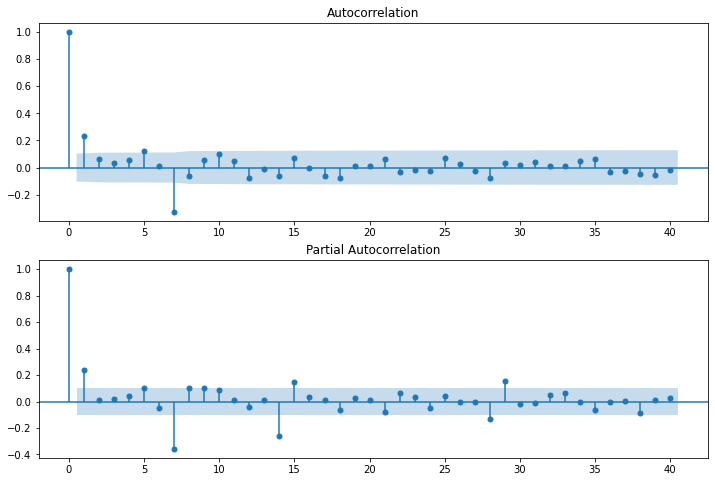

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataA['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataA['Result First Difference'].dropna(),lags=40,ax=ax2)

### p=1d=1 q=1

In [21]:
dataA

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    A        0.0          4                      NaN
2020-05-02    A        0.0          5                      NaN
2020-05-03    A        0.0          6                      NaN
2020-05-04    A      464.0          0                      NaN
2020-05-05    A      444.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    A      518.0          0                     11.0
2021-04-27    A      512.0          1                    -45.0
2021-04-28    A      491.0          2                    468.0
2021-04-29    A      425.0          3                   -102.0
2021-04-30    A      414.0          4                    -52.0

[365 rows x 4 columns]

<AxesSubplot:xlabel='DT_ENTD_PRC'>

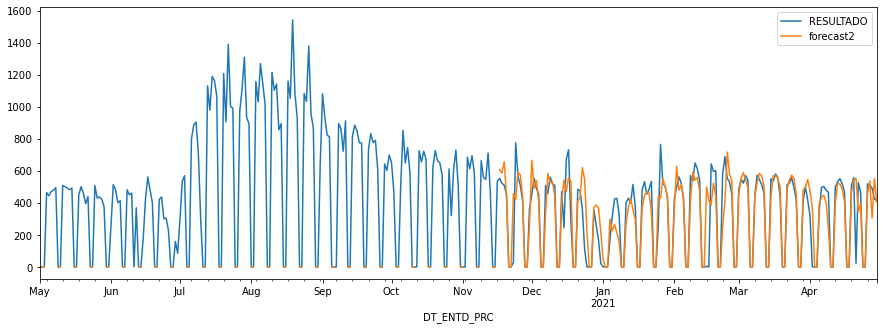

In [22]:
model1=sm.tsa.statespace.SARIMAX(dataA['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataA['forecast2']=results.predict(start=200,end=364)
for x in range(len(dataA)):
    if dataA["DayOfWeek"].iloc[x]==5:
        dataA["forecast2"].iloc[x]=0
    if dataA["DayOfWeek"].iloc[x]==6:
        dataA["forecast2"].iloc[x]=0
dataA[['RESULTADO','forecast2']].plot(figsize=(15,5))

In [23]:
mse = mean_squared_error(dataA["RESULTADO"][200:], dataA["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

134.28894648545605

In [24]:
dataA

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2020-05-01    A        0.0          4                      NaN         NaN
2020-05-02    A        0.0          5                      NaN    0.000000
2020-05-03    A        0.0          6                      NaN    0.000000
2020-05-04    A      464.0          0                      NaN         NaN
2020-05-05    A      444.0          1                      NaN         NaN
...          ..        ...        ...                      ...         ...
2021-04-26    A      518.0          0                     11.0  457.905186
2021-04-27    A      512.0          1                    -45.0  535.276240
2021-04-28    A      491.0          2                    468.0  305.436154
2021-04-29    A      425.0          3                   -102.0  551.152361
2021-04-30    A      414.0          4                    -52.0  405.318460

[365 rows x 5 columns]

In [25]:
from pandas.tseries.offsets import DateOffset


In [26]:
future_dates=[dataA.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataA.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)


In [27]:
future_datest_df

PRC RESULTADO  DayOfWeek Result First Difference forecast2
DT_ENTD_PRC                                                            
2021-05-01   NaN       NaN          5                     NaN       NaN
2021-05-02   NaN       NaN          6                     NaN       NaN
2021-05-03   NaN       NaN          0                     NaN       NaN
2021-05-04   NaN       NaN          1                     NaN       NaN
2021-05-05   NaN       NaN          2                     NaN       NaN
2021-05-06   NaN       NaN          3                     NaN       NaN
2021-05-07   NaN       NaN          4                     NaN       NaN
2021-05-08   NaN       NaN          5                     NaN       NaN
2021-05-09   NaN       NaN          6                     NaN       NaN
2021-05-10   NaN       NaN          0                     NaN       NaN
2021-05-11   NaN       NaN          1                     NaN       NaN
2021-05-12   NaN       NaN          2                     NaN       NaN
2021-05-13   NaN       NaN          3                     NaN       NaN
2021-05-14   NaN       NaN          4                     NaN       NaN
2021-05-15   NaN       NaN          5                     NaN       NaN
2021-05-16   NaN       NaN          6                     NaN       NaN
2021-05-17   NaN       NaN          0                     NaN       NaN
2021-05-18   NaN       NaN          1                     NaN       NaN
2021-05-19   NaN       NaN          2                     NaN       NaN
2021-05-20   NaN       NaN          3                     NaN       NaN
2021-05-21   NaN       NaN          4                     NaN       NaN
2021-05-22   NaN       NaN          5                     NaN       NaN
2021-05-23   NaN       NaN          6                     NaN       NaN
2021-05-24   NaN       NaN          0                     NaN       NaN
2021-05-25   NaN       NaN          1                     NaN       NaN
2021-05-26   NaN       NaN          2                     NaN       NaN
2021-05-27   NaN       NaN          3                     NaN       NaN
2021-05-28   NaN       NaN          4                     NaN       NaN
2021-05-29   NaN       NaN          5                     NaN       NaN
2021-05-30   NaN       NaN          6                     NaN       NaN
2021-05-31   NaN       NaN          0                     NaN       NaN

In [28]:

future_datest_df.tail()


PRC RESULTADO  DayOfWeek Result First Difference forecast2
DT_ENTD_PRC                                                            
2021-05-27   NaN       NaN          3                     NaN       NaN
2021-05-28   NaN       NaN          4                     NaN       NaN
2021-05-29   NaN       NaN          5                     NaN       NaN
2021-05-30   NaN       NaN          6                     NaN       NaN
2021-05-31   NaN       NaN          0                     NaN       NaN

In [29]:
future_df=pd.concat([dataA,future_datest_df])

In [30]:
future_df

PRC  RESULTADO  DayOfWeek  Result First Difference  forecast2
DT_ENTD_PRC                                                               
2020-05-01     A        0.0          4                      NaN        NaN
2020-05-02     A        0.0          5                      NaN        0.0
2020-05-03     A        0.0          6                      NaN        0.0
2020-05-04     A      464.0          0                      NaN        NaN
2020-05-05     A      444.0          1                      NaN        NaN
...          ...        ...        ...                      ...        ...
2021-05-27   NaN        NaN          3                      NaN        NaN
2021-05-28   NaN        NaN          4                      NaN        NaN
2021-05-29   NaN        NaN          5                      NaN        NaN
2021-05-30   NaN        NaN          6                      NaN        NaN
2021-05-31   NaN        NaN          0                      NaN        NaN

[396 rows x 5 columns]

<AxesSubplot:xlabel='DT_ENTD_PRC'>

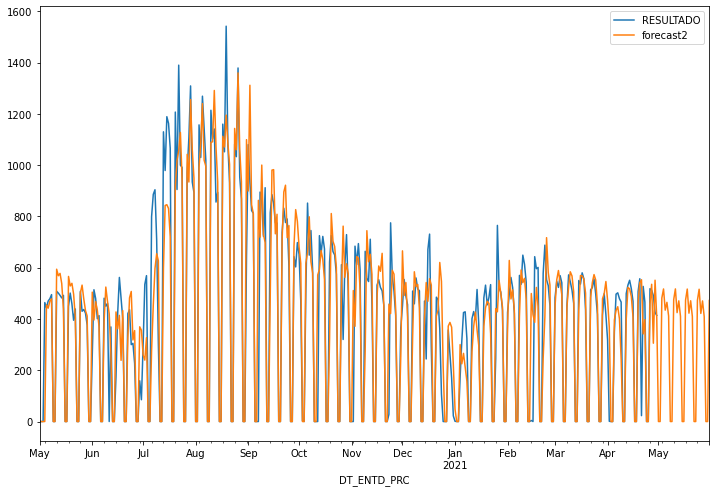

In [31]:
future_df['forecast2'] = results.predict(start = 1, end = 395,dynamic=False)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [32]:
predictionsA=future_df.tail(31)
predictionsA["PRC"]="A"
predictionsA

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    A        NaN          5                      NaN    0.000000
2021-05-02    A        NaN          6                      NaN    0.000000
2021-05-03    A        NaN          0                      NaN  481.857522
2021-05-04    A        NaN          1                      NaN  517.052630
2021-05-05    A        NaN          2                      NaN  434.463166
2021-05-06    A        NaN          3                      NaN  464.895741
2021-05-07    A        NaN          4                      NaN  411.575067
2021-05-08    A        NaN          5                      NaN    0.000000
2021-05-09    A        NaN          6                      NaN    0.000000
2021-05-10    A        NaN          0                      NaN  475.508055
2021-05-11    A        NaN          1                      NaN  517.260808
2021-05-12    A        NaN          2                      NaN  424.777274
2021-05-13    A        NaN          3                      NaN  470.680950
2021-05-14    A        NaN          4                      NaN  410.568956
2021-05-15    A        NaN          5                      NaN    0.000000
2021-05-16    A        NaN          6                      NaN    0.000000
2021-05-17    A        NaN          0                      NaN  473.872065
2021-05-18    A        NaN          1                      NaN  516.677057
2021-05-19    A        NaN          2                      NaN  422.605919
2021-05-20    A        NaN          3                      NaN  470.992090
2021-05-21    A        NaN          4                      NaN  409.790360
2021-05-22    A        NaN          5                      NaN    0.000000
2021-05-23    A        NaN          6                      NaN    0.000000
2021-05-24    A        NaN          0                      NaN  472.992398
2021-05-25    A        NaN          1                      NaN  515.966232
2021-05-26    A        NaN          2                      NaN  421.640347
2021-05-27    A        NaN          3                      NaN  470.424860
2021-05-28    A        NaN          4                      NaN  409.048270
2021-05-29    A        NaN          5                      NaN    0.000000
2021-05-30    A        NaN          6                      NaN    0.000000
2021-05-31    A        NaN          0                      NaN  472.234091

### Process B

In [33]:
dataB=df_aux[df_aux.PRC=="B"]
dataB.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   B        0.0          4
1  2020-05-02   B        0.0          5
2  2020-05-03   B        0.0          6
3  2020-05-04   B      522.0          0
4  2020-05-05   B      449.0          1

In [34]:
dataB.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataB["RESULTADO"])


ADF Test Statistic : -2.0322929309476194
p-value : 0.2725956806443611
#Lags Used : 13
Number of Observations Used : 351
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [35]:

dataB['Result First Difference'] = dataA['RESULTADO'] - dataA['RESULTADO'].shift(7)

### Checking stationarity again

In [36]:
adfuller_test(dataB["Result First Difference"].dropna())

ADF Test Statistic : -4.849218486292122
p-value : 4.3744515517419985e-05
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DT_ENTD_PRC'>

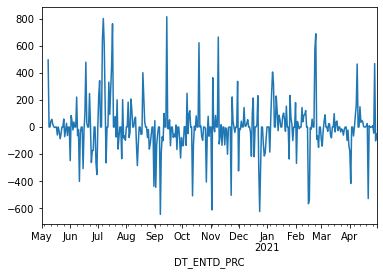

In [37]:
dataB['Result First Difference'].plot()

### finding p d q

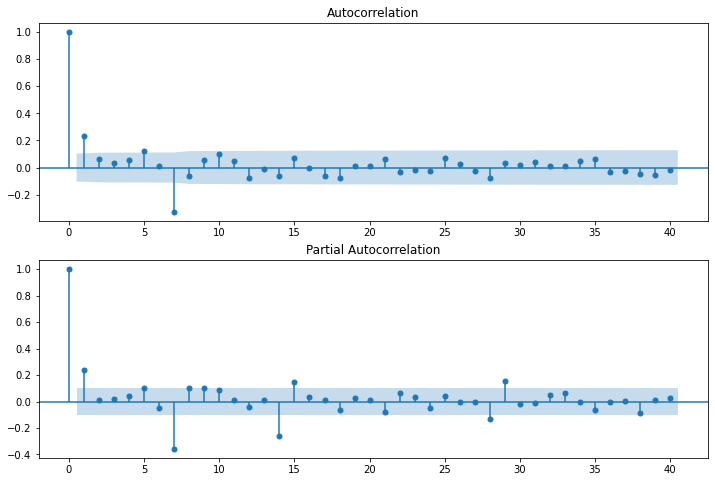

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataB['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataB['Result First Difference'].dropna(),lags=40,ax=ax2)

### p=1,d=1,q=1

In [39]:
dataB

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    B        0.0          4                      NaN
2020-05-02    B        0.0          5                      NaN
2020-05-03    B        0.0          6                      NaN
2020-05-04    B      522.0          0                      NaN
2020-05-05    B      449.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    B      342.0          0                     11.0
2021-04-27    B      409.0          1                    -45.0
2021-04-28    B      341.0          2                    468.0
2021-04-29    B      309.0          3                   -102.0
2021-04-30    B      320.0          4                    -52.0

[365 rows x 4 columns]

### Running the model 

<AxesSubplot:xlabel='DT_ENTD_PRC'>

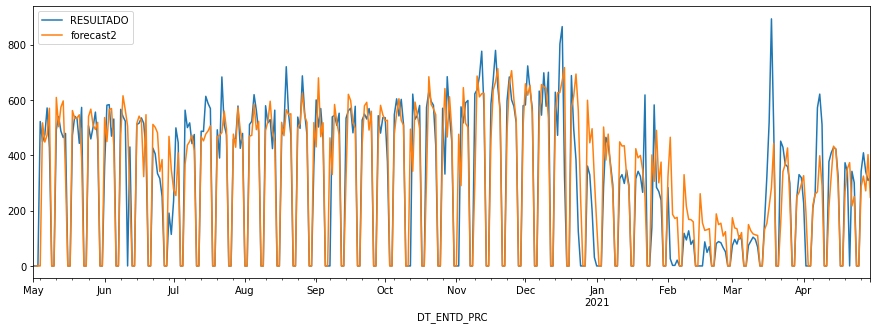

In [40]:
model1=sm.tsa.statespace.SARIMAX(dataB['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataB['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataB)):
    if dataB["DayOfWeek"].iloc[x]==5:
        dataB["forecast2"].iloc[x]=0
    if dataB["DayOfWeek"].iloc[x]==6:
        dataB["forecast2"].iloc[x]=0
dataB[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [41]:
mse = mean_squared_error(dataB["RESULTADO"][200:], dataB["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

136.60011772472924

### Creating the date to be predicted

In [42]:
future_dates=[dataA.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataA.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataB,future_datest_df])

### Preddicting


<AxesSubplot:xlabel='DT_ENTD_PRC'>

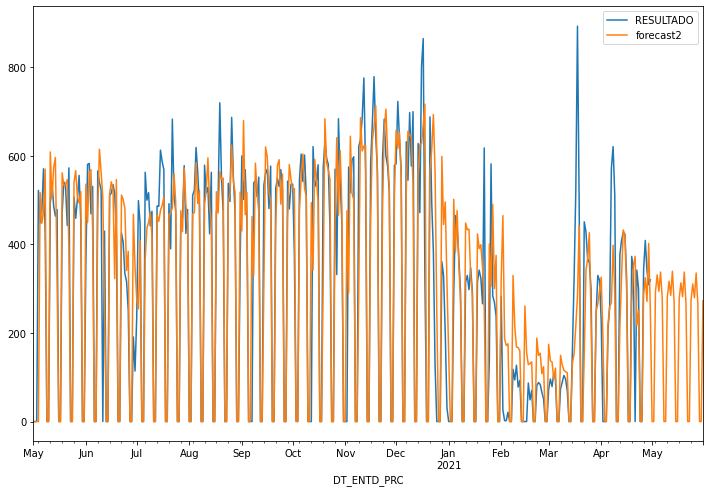

In [43]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [44]:
future_df.tail(31)

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                                
2021-05-01   NaN        NaN          5                      NaN    0.000000
2021-05-02   NaN        NaN          6                      NaN    0.000000
2021-05-03   NaN        NaN          0                      NaN  292.948778
2021-05-04   NaN        NaN          1                      NaN  331.187274
2021-05-05   NaN        NaN          2                      NaN  294.124453
2021-05-06   NaN        NaN          3                      NaN  337.624778
2021-05-07   NaN        NaN          4                      NaN  278.314573
2021-05-08   NaN        NaN          5                      NaN    0.000000
2021-05-09   NaN        NaN          6                      NaN    0.000000
2021-05-10   NaN        NaN          0                      NaN  280.890943
2021-05-11   NaN        NaN          1                      NaN  317.059429
2021-05-12   NaN        NaN          2                      NaN  285.097975
2021-05-13   NaN        NaN          3                      NaN  339.399308
2021-05-14   NaN        NaN          4                      NaN  270.508787
2021-05-15   NaN        NaN          5                      NaN    0.000000
2021-05-16   NaN        NaN          6                      NaN    0.000000
2021-05-17   NaN        NaN          0                      NaN  277.290031
2021-05-18   NaN        NaN          1                      NaN  313.177128
2021-05-19   NaN        NaN          2                      NaN  281.923908
2021-05-20   NaN        NaN          3                      NaN  337.721067
2021-05-21   NaN        NaN          4                      NaN  267.505009
2021-05-22   NaN        NaN          5                      NaN    0.000000
2021-05-23   NaN        NaN          6                      NaN    0.000000
2021-05-24   NaN        NaN          0                      NaN  274.868497
2021-05-25   NaN        NaN          1                      NaN  310.716663
2021-05-26   NaN        NaN          2                      NaN  279.561470
2021-05-27   NaN        NaN          3                      NaN  335.565658
2021-05-28   NaN        NaN          4                      NaN  265.166143
2021-05-29   NaN        NaN          5                      NaN    0.000000
2021-05-30   NaN        NaN          6                      NaN    0.000000
2021-05-31   NaN        NaN          0                      NaN  272.610216

In [45]:
predictionsB=future_df.tail(31)
predictionsB["PRC"]="B"
predictionsB

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    B        NaN          5                      NaN    0.000000
2021-05-02    B        NaN          6                      NaN    0.000000
2021-05-03    B        NaN          0                      NaN  292.948778
2021-05-04    B        NaN          1                      NaN  331.187274
2021-05-05    B        NaN          2                      NaN  294.124453
2021-05-06    B        NaN          3                      NaN  337.624778
2021-05-07    B        NaN          4                      NaN  278.314573
2021-05-08    B        NaN          5                      NaN    0.000000
2021-05-09    B        NaN          6                      NaN    0.000000
2021-05-10    B        NaN          0                      NaN  280.890943
2021-05-11    B        NaN          1                      NaN  317.059429
2021-05-12    B        NaN          2                      NaN  285.097975
2021-05-13    B        NaN          3                      NaN  339.399308
2021-05-14    B        NaN          4                      NaN  270.508787
2021-05-15    B        NaN          5                      NaN    0.000000
2021-05-16    B        NaN          6                      NaN    0.000000
2021-05-17    B        NaN          0                      NaN  277.290031
2021-05-18    B        NaN          1                      NaN  313.177128
2021-05-19    B        NaN          2                      NaN  281.923908
2021-05-20    B        NaN          3                      NaN  337.721067
2021-05-21    B        NaN          4                      NaN  267.505009
2021-05-22    B        NaN          5                      NaN    0.000000
2021-05-23    B        NaN          6                      NaN    0.000000
2021-05-24    B        NaN          0                      NaN  274.868497
2021-05-25    B        NaN          1                      NaN  310.716663
2021-05-26    B        NaN          2                      NaN  279.561470
2021-05-27    B        NaN          3                      NaN  335.565658
2021-05-28    B        NaN          4                      NaN  265.166143
2021-05-29    B        NaN          5                      NaN    0.000000
2021-05-30    B        NaN          6                      NaN    0.000000
2021-05-31    B        NaN          0                      NaN  272.610216

### Process C

In [46]:
dataC=df_aux[df_aux.PRC=="C"]
dataC.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   C        0.0          4
1  2020-05-02   C        0.0          5
2  2020-05-03   C        0.0          6
3  2020-05-04   C      302.0          0
4  2020-05-05   C      344.0          1

In [47]:
dataC.set_index("DT_ENTD_PRC", inplace=True)

In [48]:

adfuller_test(dataC["RESULTADO"])


ADF Test Statistic : -2.7421300311450003
p-value : 0.06702732635407385
#Lags Used : 15
Number of Observations Used : 349
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [49]:

dataC['Result First Difference'] = dataC['RESULTADO'] - dataC['RESULTADO'].shift(7)
adfuller_test(dataC['Result First Difference'].dropna())

ADF Test Statistic : -5.545615900756204
p-value : 1.6635233005280698e-06
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DT_ENTD_PRC'>

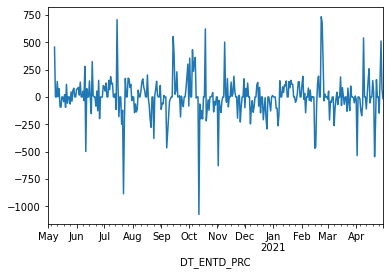

In [50]:
dataC['Result First Difference'].plot()

### Finding p , d , q

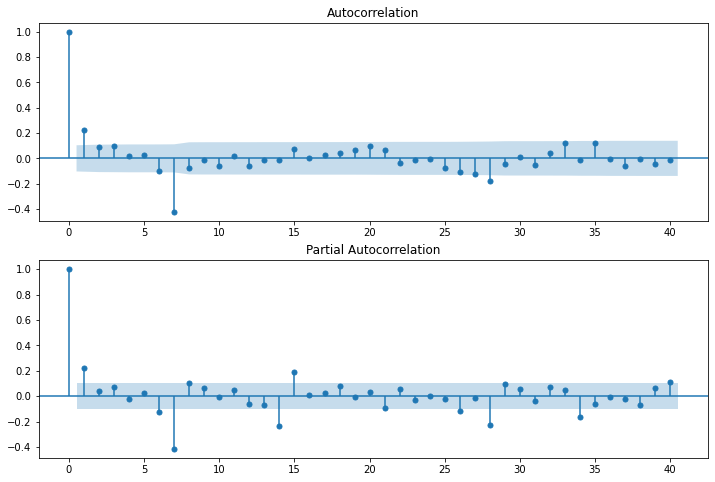

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataC['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataC['Result First Difference'].dropna(),lags=40,ax=ax2)

### pdq = (1,1,1)

In [52]:
dataC

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    C        0.0          4                      NaN
2020-05-02    C        0.0          5                      NaN
2020-05-03    C        0.0          6                      NaN
2020-05-04    C      302.0          0                      NaN
2020-05-05    C      344.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    C      369.0          0                   -148.0
2021-04-27    C      689.0          1                    176.0
2021-04-28    C      512.0          2                    512.0
2021-04-29    C      483.0          3                     80.0
2021-04-30    C      628.0          4                    -15.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

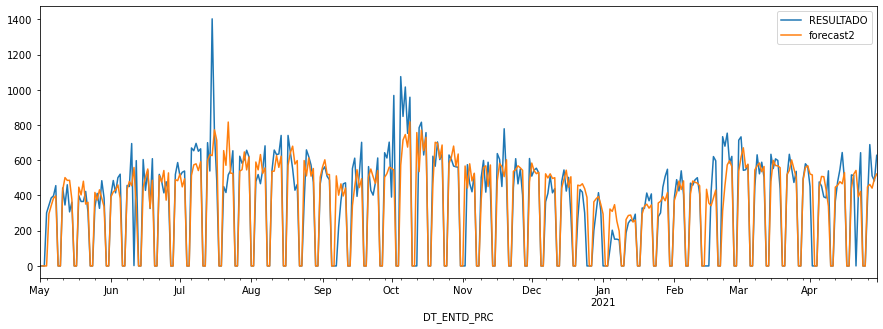

In [53]:
model1=sm.tsa.statespace.SARIMAX(dataC['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataC['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataC)):
    if dataC["DayOfWeek"].iloc[x]==5:
        dataC["forecast2"].iloc[x]=0
    if dataC["DayOfWeek"].iloc[x]==6:
        
        dataC["forecast2"].iloc[x]=0
dataC[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [54]:
mse = mean_squared_error(dataC["RESULTADO"][200:], dataC["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

121.63805504672324

### Creating the date to be predicted

In [55]:
future_dates=[dataC.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataC.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataC,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

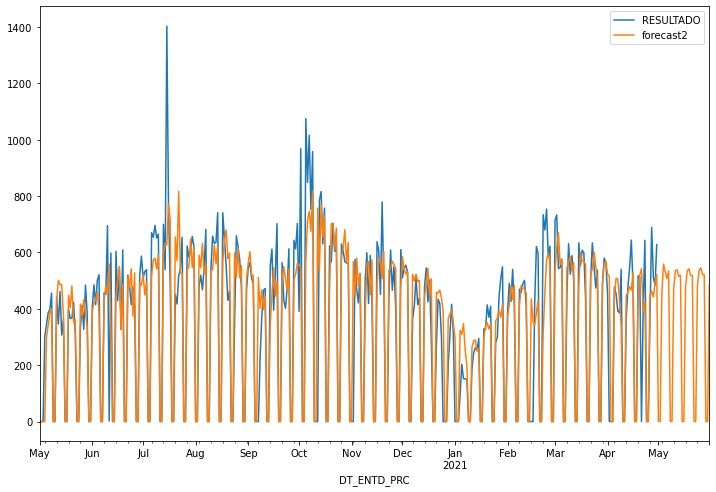

In [56]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [57]:
predictionsC=future_df.tail(31)
predictionsC["PRC"]="C"
predictionsC

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    C        NaN          5                      NaN    0.000000
2021-05-02    C        NaN          6                      NaN    0.000000
2021-05-03    C        NaN          0                      NaN  454.344034
2021-05-04    C        NaN          1                      NaN  559.014320
2021-05-05    C        NaN          2                      NaN  532.123439
2021-05-06    C        NaN          3                      NaN  507.361816
2021-05-07    C        NaN          4                      NaN  534.767059
2021-05-08    C        NaN          5                      NaN    0.000000
2021-05-09    C        NaN          6                      NaN    0.000000
2021-05-10    C        NaN          0                      NaN  472.687167
2021-05-11    C        NaN          1                      NaN  536.494148
2021-05-12    C        NaN          2                      NaN  538.383476
2021-05-13    C        NaN          3                      NaN  514.442057
2021-05-14    C        NaN          4                      NaN  519.346340
2021-05-15    C        NaN          5                      NaN    0.000000
2021-05-16    C        NaN          6                      NaN    0.000000
2021-05-17    C        NaN          0                      NaN  478.617492
2021-05-18    C        NaN          1                      NaN  534.605035
2021-05-19    C        NaN          2                      NaN  542.001628
2021-05-20    C        NaN          3                      NaN  518.217160
2021-05-21    C        NaN          4                      NaN  518.815750
2021-05-22    C        NaN          5                      NaN    0.000000
2021-05-23    C        NaN          6                      NaN    0.000000
2021-05-24    C        NaN          0                      NaN  482.172552
2021-05-25    C        NaN          1                      NaN  536.663799
2021-05-26    C        NaN          2                      NaN  545.114240
2021-05-27    C        NaN          3                      NaN  521.359806
2021-05-28    C        NaN          4                      NaN  521.134475
2021-05-29    C        NaN          5                      NaN    0.000000
2021-05-30    C        NaN          6                      NaN    0.000000
2021-05-31    C        NaN          0                      NaN  485.273091

### Process D

In [58]:
dataD=df_aux[df_aux.PRC=="D"]
dataD.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   D       25.0          4
1  2020-05-02   D        0.0          5
2  2020-05-03   D        0.0          6
3  2020-05-04   D      315.0          0
4  2020-05-05   D      219.0          1

In [59]:
dataD.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataD["RESULTADO"])


ADF Test Statistic : -2.890629433031336
p-value : 0.04644856835043151
#Lags Used : 16
Number of Observations Used : 348
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding PDQ

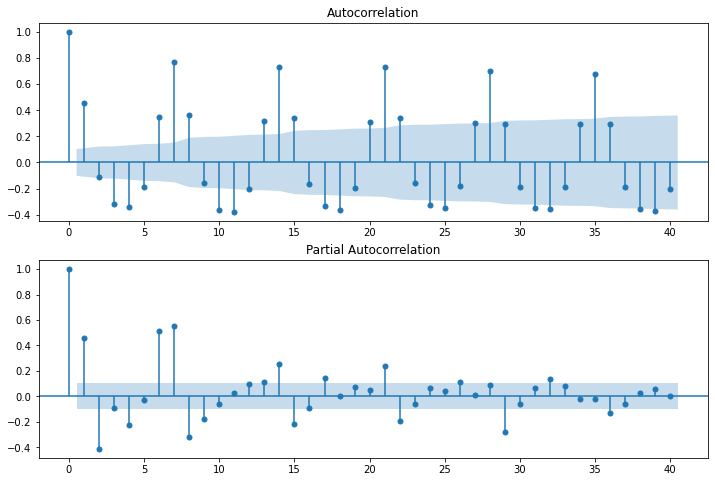

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataD['RESULTADO'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataD['RESULTADO'],lags=40,ax=ax2)

### PDQ = (3,0,2)

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

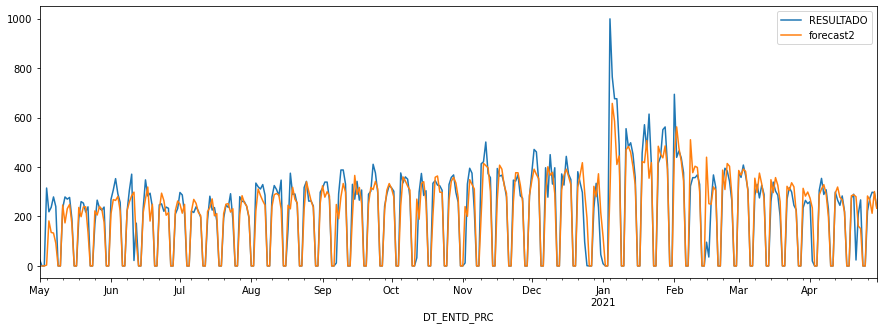

In [61]:
model1=sm.tsa.statespace.SARIMAX(dataD['RESULTADO'],order=(3, 0, 2),seasonal_order=(3,0,2,7),dynamic=True)
results=model1.fit()
dataD['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataD)):
    if dataD["DayOfWeek"].iloc[x]==5:
        dataD["forecast2"].iloc[x]=0
    if dataD["DayOfWeek"].iloc[x]==6:
        
        dataD["forecast2"].iloc[x]=0
dataD[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [62]:
mse = mean_squared_error(dataD["RESULTADO"][200:], dataD["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

94.21954842047302

### Creating dates to be predicted

In [63]:
future_dates=[dataD.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataD.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataD,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

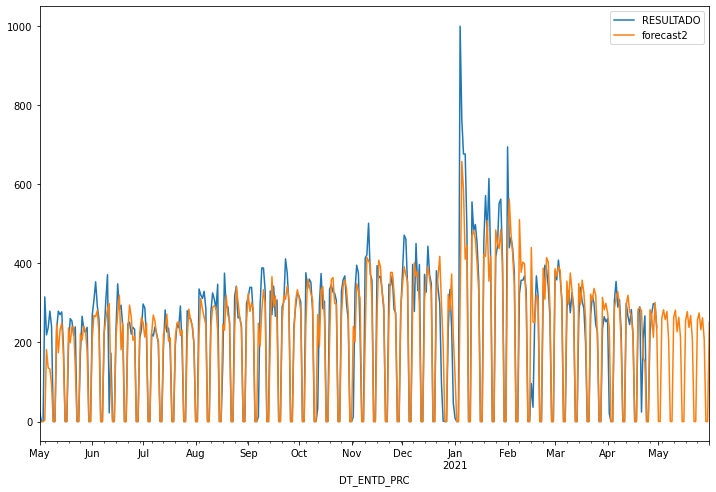

In [64]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [65]:
predictionsD=future_df.tail(31)
predictionsD["PRC"]="D"
predictionsD

PRC  RESULTADO  DayOfWeek   forecast2
DT_ENTD_PRC                                      
2021-05-01    D        NaN          5    0.000000
2021-05-02    D        NaN          6    0.000000
2021-05-03    D        NaN          0  261.363035
2021-05-04    D        NaN          1  282.459859
2021-05-05    D        NaN          2  257.643526
2021-05-06    D        NaN          3  277.849546
2021-05-07    D        NaN          4  207.908079
2021-05-08    D        NaN          5    0.000000
2021-05-09    D        NaN          6    0.000000
2021-05-10    D        NaN          0  264.162763
2021-05-11    D        NaN          1  281.500983
2021-05-12    D        NaN          2  226.599476
2021-05-13    D        NaN          3  263.430914
2021-05-14    D        NaN          4  213.336850
2021-05-15    D        NaN          5    0.000000
2021-05-16    D        NaN          6    0.000000
2021-05-17    D        NaN          0  254.539824
2021-05-18    D        NaN          1  277.606975
2021-05-19    D        NaN          2  237.957143
2021-05-20    D        NaN          3  267.679044
2021-05-21    D        NaN          4  208.636576
2021-05-22    D        NaN          5    0.000000
2021-05-23    D        NaN          6    0.000000
2021-05-24    D        NaN          0  255.523263
2021-05-25    D        NaN          1  274.405982
2021-05-26    D        NaN          2  232.453381
2021-05-27    D        NaN          3  262.072695
2021-05-28    D        NaN          4  207.895241
2021-05-29    D        NaN          5    0.000000
2021-05-30    D        NaN          6    0.000000
2021-05-31    D        NaN          0  251.237231

### Process E

In [66]:
dataE=df_aux[df_aux.PRC=="E"]
dataE.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   E        0.0          4
1  2020-05-02   E        0.0          5
2  2020-05-03   E        0.0          6
3  2020-05-04   E      306.0          0
4  2020-05-05   E      360.0          1

In [67]:
dataE.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataE["RESULTADO"])


ADF Test Statistic : -2.3909732565371415
p-value : 0.14430036562296578
#Lags Used : 14
Number of Observations Used : 350
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [68]:

dataE['Result First Difference'] = dataE['RESULTADO'] - dataE['RESULTADO'].shift(7)
adfuller_test(dataE['Result First Difference'].dropna())

ADF Test Statistic : -5.641847260219985
p-value : 1.0322229100977634e-06
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DT_ENTD_PRC'>

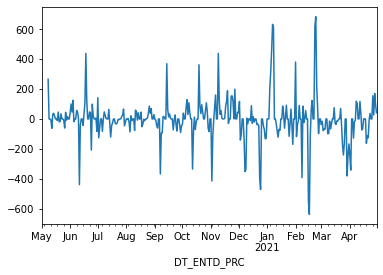

In [69]:
dataE['Result First Difference'].plot()

### Finding P,D,Q

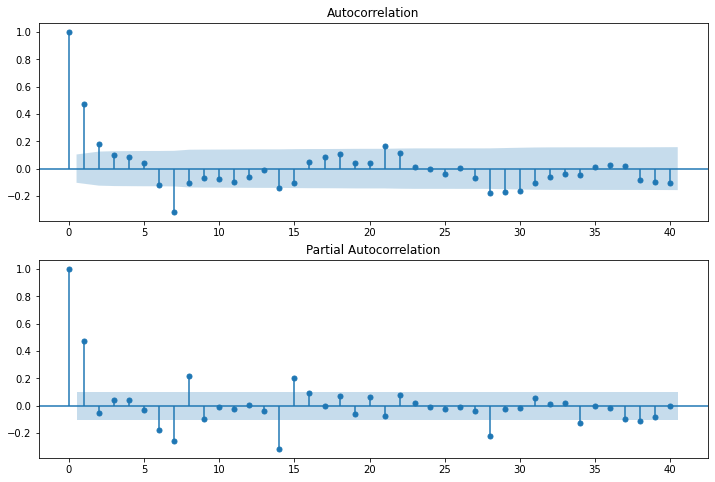

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataE['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataE['Result First Difference'].dropna(),lags=40,ax=ax2)

### PDQ=(1,1,2)

In [71]:
dataE

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    E        0.0          4                      NaN
2020-05-02    E        0.0          5                      NaN
2020-05-03    E        0.0          6                      NaN
2020-05-04    E      306.0          0                      NaN
2020-05-05    E      360.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    E      226.0          0                    155.0
2021-04-27    E      184.0          1                     27.0
2021-04-28    E      171.0          2                    171.0
2021-04-29    E      226.0          3                     95.0
2021-04-30    E      183.0          4                     41.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

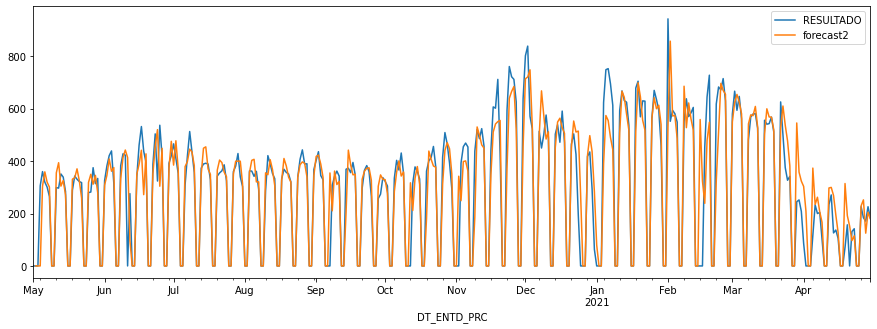

In [72]:
model1=sm.tsa.statespace.SARIMAX(dataE['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataE['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataE)):
    if dataE["DayOfWeek"].iloc[x]==5:
        dataE["forecast2"].iloc[x]=0
    if dataE["DayOfWeek"].iloc[x]==6:
        
        dataE["forecast2"].iloc[x]=0
dataE[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [73]:
mse = mean_squared_error(dataE["RESULTADO"][200:], dataE["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

117.45298883926523

### Creating dates to be predicted

In [74]:
future_dates=[dataE.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataE.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataE,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

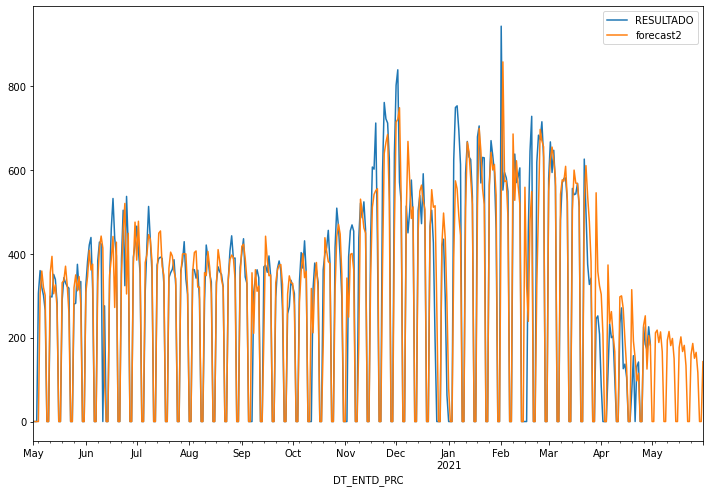

In [75]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [76]:
predictionsE=future_df.tail(31)
predictionsE["PRC"]="E"
predictionsE

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    E        NaN          5                      NaN    0.000000
2021-05-02    E        NaN          6                      NaN    0.000000
2021-05-03    E        NaN          0                      NaN  211.685893
2021-05-04    E        NaN          1                      NaN  218.070208
2021-05-05    E        NaN          2                      NaN  188.528572
2021-05-06    E        NaN          3                      NaN  213.817656
2021-05-07    E        NaN          4                      NaN  166.715204
2021-05-08    E        NaN          5                      NaN    0.000000
2021-05-09    E        NaN          6                      NaN    0.000000
2021-05-10    E        NaN          0                      NaN  193.720776
2021-05-11    E        NaN          1                      NaN  214.835443
2021-05-12    E        NaN          2                      NaN  181.061790
2021-05-13    E        NaN          3                      NaN  198.130994
2021-05-14    E        NaN          4                      NaN  149.976050
2021-05-15    E        NaN          5                      NaN    0.000000
2021-05-16    E        NaN          6                      NaN    0.000000
2021-05-17    E        NaN          0                      NaN  176.601345
2021-05-18    E        NaN          1                      NaN  201.913689
2021-05-19    E        NaN          2                      NaN  166.939275
2021-05-20    E        NaN          3                      NaN  181.671444
2021-05-21    E        NaN          4                      NaN  133.217851
2021-05-22    E        NaN          5                      NaN    0.000000
2021-05-23    E        NaN          6                      NaN    0.000000
2021-05-24    E        NaN          0                      NaN  159.735633
2021-05-25    E        NaN          1                      NaN  186.242314
2021-05-26    E        NaN          2                      NaN  150.926291
2021-05-27    E        NaN          3                      NaN  164.993557
2021-05-28    E        NaN          4                      NaN  116.455000
2021-05-29    E        NaN          5                      NaN    0.000000
2021-05-30    E        NaN          6                      NaN    0.000000
2021-05-31    E        NaN          0                      NaN  142.942198

### Process F

In [77]:
dataF=df_aux[df_aux.PRC=="F"]
dataF.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   F      436.0          4
1  2020-05-02   F        0.0          5
2  2020-05-03   F        0.0          6
3  2020-05-04   F       23.0          0
4  2020-05-05   F      452.0          1

In [78]:
dataF.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataF["RESULTADO"])


ADF Test Statistic : -2.366562827859346
p-value : 0.15139700482263957
#Lags Used : 13
Number of Observations Used : 351
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [79]:

dataF['Result First Difference'] = dataF['RESULTADO'] - dataF['RESULTADO'].shift(7)
adfuller_test(dataF['Result First Difference'].dropna())

ADF Test Statistic : -5.602500709126242
p-value : 1.2554901006756623e-06
#Lags Used : 16
Number of Observations Used : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DT_ENTD_PRC'>

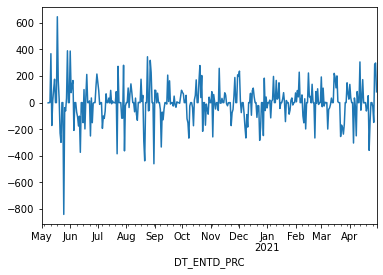

In [80]:
dataF['Result First Difference'].plot()

### Finding P,D,Q

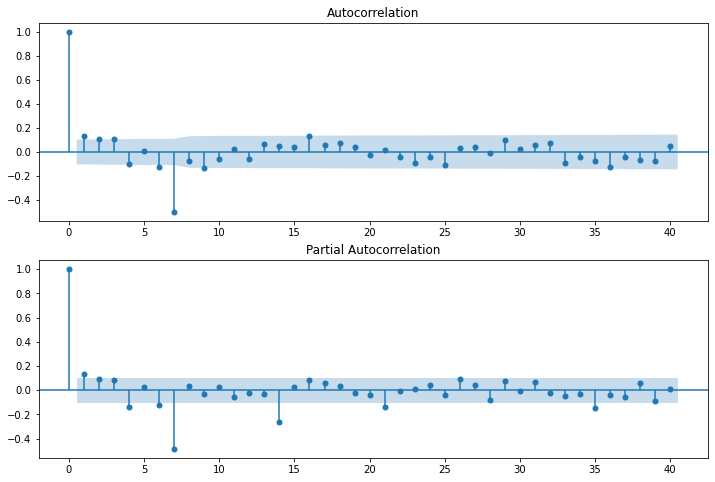

In [81]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataF['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataF['Result First Difference'].dropna(),lags=40,ax=ax2)

### PDQ =(1,1,2)

In [82]:
dataF

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    F      436.0          4                      NaN
2020-05-02    F        0.0          5                      NaN
2020-05-03    F        0.0          6                      NaN
2020-05-04    F       23.0          0                      NaN
2020-05-05    F      452.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    F      230.0          0                    -32.0
2021-04-27    F      105.0          1                   -149.0
2021-04-28    F      583.0          2                    288.0
2021-04-29    F      299.0          3                    298.0
2021-04-30    F      257.0          4                     81.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

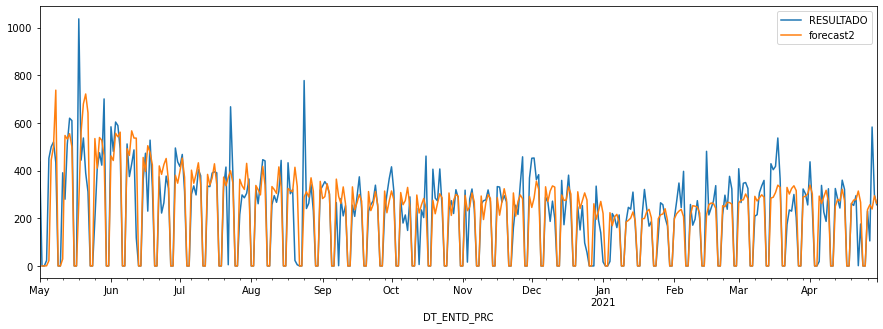

In [83]:
model1=sm.tsa.statespace.SARIMAX(dataF['RESULTADO'],order=(1, 1, 2),seasonal_order=(1,1,2,7),dynamic=True)
results=model1.fit()
dataF['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataF)):
    if dataF["DayOfWeek"].iloc[x]==5:
        dataF["forecast2"].iloc[x]=0
    if dataF["DayOfWeek"].iloc[x]==6:
        
        dataF["forecast2"].iloc[x]=0
dataF[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [84]:
mse = mean_squared_error(dataF["RESULTADO"][200:], dataF["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

88.52843133517052

### Creating dates to be predicted

In [85]:
future_dates=[dataF.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataF.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataF,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

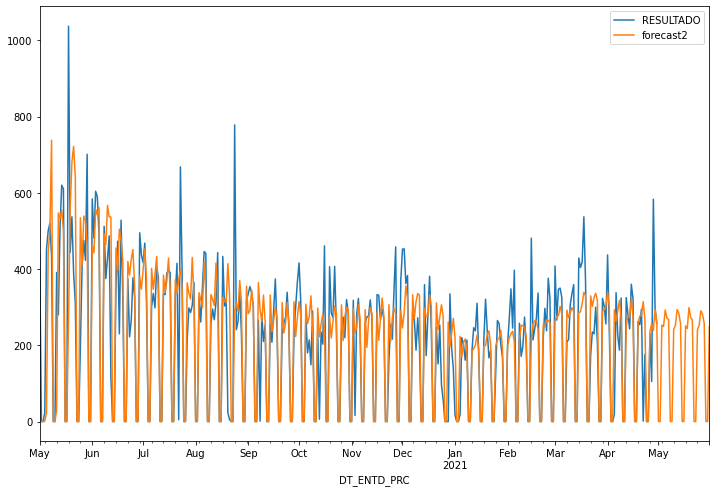

In [86]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [87]:
predictionsF=future_df.tail(31)
predictionsF["PRC"]="F"
predictionsF

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    F        NaN          5                      NaN    0.000000
2021-05-02    F        NaN          6                      NaN    0.000000
2021-05-03    F        NaN          0                      NaN  252.926192
2021-05-04    F        NaN          1                      NaN  249.154264
2021-05-05    F        NaN          2                      NaN  292.584877
2021-05-06    F        NaN          3                      NaN  271.016227
2021-05-07    F        NaN          4                      NaN  267.802178
2021-05-08    F        NaN          5                      NaN    0.000000
2021-05-09    F        NaN          6                      NaN    0.000000
2021-05-10    F        NaN          0                      NaN  241.815298
2021-05-11    F        NaN          1                      NaN  252.460952
2021-05-12    F        NaN          2                      NaN  293.692783
2021-05-13    F        NaN          3                      NaN  284.097659
2021-05-14    F        NaN          4                      NaN  258.271348
2021-05-15    F        NaN          5                      NaN    0.000000
2021-05-16    F        NaN          6                      NaN    0.000000
2021-05-17    F        NaN          0                      NaN  250.888194
2021-05-18    F        NaN          1                      NaN  244.008998
2021-05-19    F        NaN          2                      NaN  299.112620
2021-05-20    F        NaN          3                      NaN  272.926838
2021-05-21    F        NaN          4                      NaN  266.661286
2021-05-22    F        NaN          5                      NaN    0.000000
2021-05-23    F        NaN          6                      NaN    0.000000
2021-05-24    F        NaN          0                      NaN  241.098095
2021-05-25    F        NaN          1                      NaN  251.868730
2021-05-26    F        NaN          2                      NaN  290.487711
2021-05-27    F        NaN          3                      NaN  281.468072
2021-05-28    F        NaN          4                      NaN  257.281197
2021-05-29    F        NaN          5                      NaN    0.000000
2021-05-30    F        NaN          6                      NaN    0.000000
2021-05-31    F        NaN          0                      NaN  249.032566

### Process G

In [88]:
dataG=df_aux[df_aux.PRC=="G"]
dataG.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   G        0.0          4
1  2020-05-02   G        0.0          5
2  2020-05-03   G        0.0          6
3  2020-05-04   G      523.0          0
4  2020-05-05   G      527.0          1

In [89]:
dataG.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataG["RESULTADO"])


ADF Test Statistic : -2.4251153431874846
p-value : 0.13477288854140346
#Lags Used : 14
Number of Observations Used : 350
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [90]:

dataG['Result First Difference'] = dataG['RESULTADO'] - dataG['RESULTADO'].shift(7)
adfuller_test(dataG['Result First Difference'].dropna())

ADF Test Statistic : -4.668559551627111
p-value : 9.637336959213403e-05
#Lags Used : 16
Number of Observations Used : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

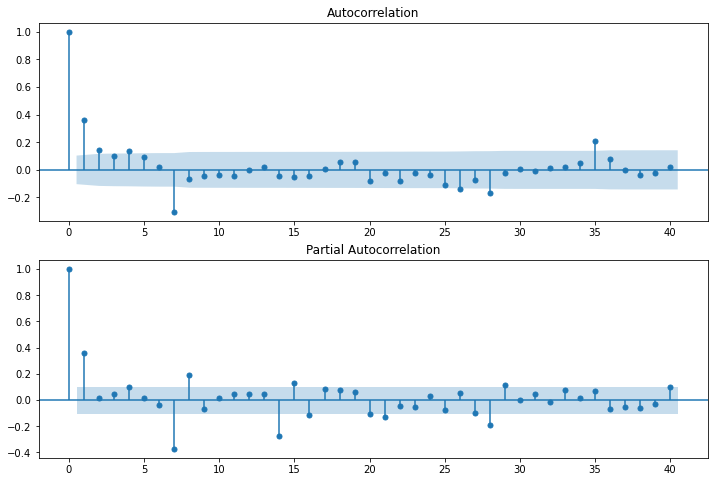

In [91]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataG['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataG['Result First Difference'].dropna(),lags=40,ax=ax2)

### P,D,Q = 1,1,2

In [92]:
dataG

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    G        0.0          4                      NaN
2020-05-02    G        0.0          5                      NaN
2020-05-03    G        0.0          6                      NaN
2020-05-04    G      523.0          0                      NaN
2020-05-05    G      527.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    G      501.0          0                     29.0
2021-04-27    G      590.0          1                    100.0
2021-04-28    G      560.0          2                    560.0
2021-04-29    G      520.0          3                    -35.0
2021-04-30    G      459.0          4                    -78.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

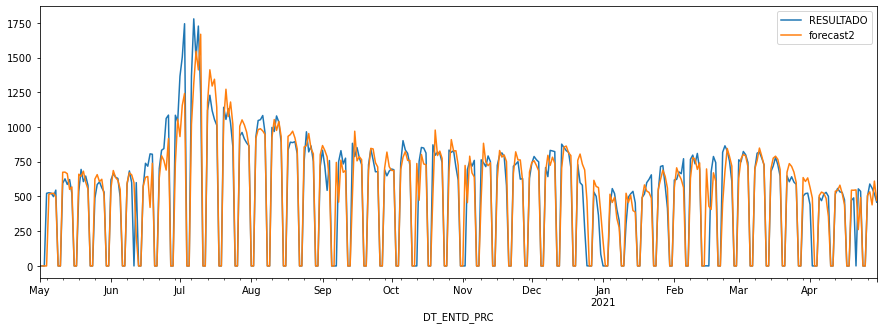

In [93]:
model1=sm.tsa.statespace.SARIMAX(dataG['RESULTADO'],order=(1, 1, 2),seasonal_order=(1,1,2,7),dynamic=True)
results=model1.fit()
dataG['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataG)):
    if dataG["DayOfWeek"].iloc[x]==5:
        dataG["forecast2"].iloc[x]=0
    if dataG["DayOfWeek"].iloc[x]==6:
        
        dataG["forecast2"].iloc[x]=0
dataG[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [94]:
mse = mean_squared_error(dataG["RESULTADO"][200:], dataG["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

130.89008140623784

### Creating dates to be predicted

In [95]:
future_dates=[dataG.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataG.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataG,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

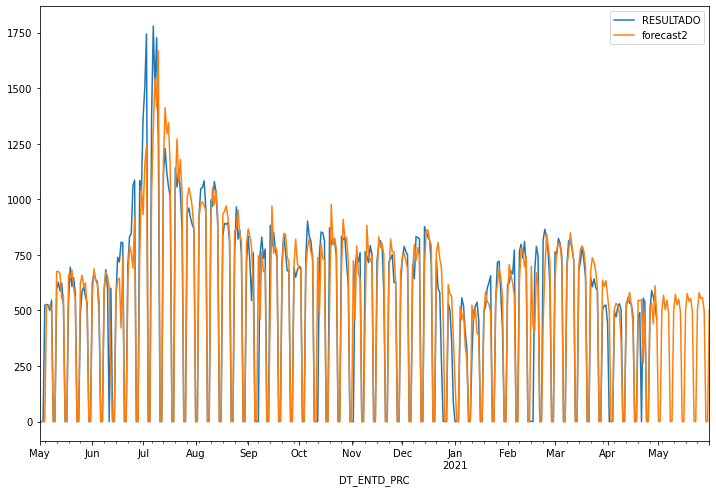

In [96]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [97]:
predictionsG=future_df.tail(31)
predictionsG["PRC"]="G"
predictionsG

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    G        NaN          5                      NaN    0.000000
2021-05-02    G        NaN          6                      NaN    0.000000
2021-05-03    G        NaN          0                      NaN  498.418039
2021-05-04    G        NaN          1                      NaN  568.241132
2021-05-05    G        NaN          2                      NaN  502.564990
2021-05-06    G        NaN          3                      NaN  545.885806
2021-05-07    G        NaN          4                      NaN  486.672588
2021-05-08    G        NaN          5                      NaN    0.000000
2021-05-09    G        NaN          6                      NaN    0.000000
2021-05-10    G        NaN          0                      NaN  499.277796
2021-05-11    G        NaN          1                      NaN  572.758836
2021-05-12    G        NaN          2                      NaN  524.697924
2021-05-13    G        NaN          3                      NaN  550.371256
2021-05-14    G        NaN          4                      NaN  490.767323
2021-05-15    G        NaN          5                      NaN    0.000000
2021-05-16    G        NaN          6                      NaN    0.000000
2021-05-17    G        NaN          0                      NaN  500.450886
2021-05-18    G        NaN          1                      NaN  576.608724
2021-05-19    G        NaN          2                      NaN  541.348906
2021-05-20    G        NaN          3                      NaN  554.199453
2021-05-21    G        NaN          4                      NaN  494.311631
2021-05-22    G        NaN          5                      NaN    0.000000
2021-05-23    G        NaN          6                      NaN    0.000000
2021-05-24    G        NaN          0                      NaN  501.872285
2021-05-25    G        NaN          1                      NaN  579.975123
2021-05-26    G        NaN          2                      NaN  554.016770
2021-05-27    G        NaN          3                      NaN  557.550091
2021-05-28    G        NaN          4                      NaN  497.455992
2021-05-29    G        NaN          5                      NaN    0.000000
2021-05-30    G        NaN          6                      NaN    0.000000
2021-05-31    G        NaN          0                      NaN  503.474109

### Process H

In [98]:
dataH=df_aux[df_aux.PRC=="H"]
dataH.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   H        1.0          4
1  2020-05-02   H        0.0          5
2  2020-05-03   H        0.0          6
3  2020-05-04   H      194.0          0
4  2020-05-05   H      222.0          1

In [99]:
dataH.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataH["RESULTADO"])

ADF Test Statistic : -2.9333738994141596
p-value : 0.04160244089138311
#Lags Used : 14
Number of Observations Used : 350
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

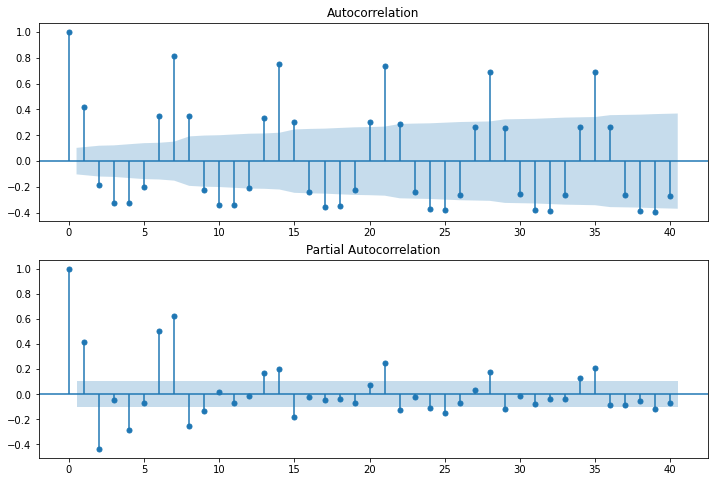

In [100]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataH['RESULTADO'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataH['RESULTADO'],lags=40,ax=ax2)

### PDQ=(2,0,1)

In [101]:

dataH

PRC  RESULTADO  DayOfWeek
DT_ENTD_PRC                          
2020-05-01    H        1.0          4
2020-05-02    H        0.0          5
2020-05-03    H        0.0          6
2020-05-04    H      194.0          0
2020-05-05    H      222.0          1
...          ..        ...        ...
2021-04-26    H      261.0          0
2021-04-27    H      269.0          1
2021-04-28    H      262.0          2
2021-04-29    H      282.0          3
2021-04-30    H      241.0          4

[365 rows x 3 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

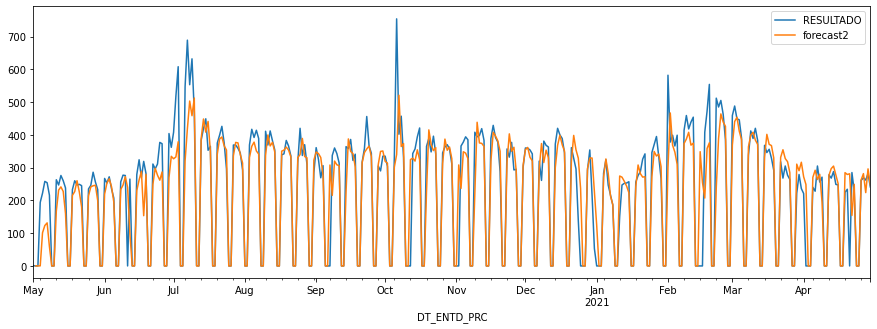

In [102]:
model1=sm.tsa.statespace.SARIMAX(dataH['RESULTADO'],order=(2, 0, 1),seasonal_order=(2,0,1,7),dynamic=True)
results=model1.fit()
dataH['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataH)):
    if dataH["DayOfWeek"].iloc[x]==5:
        dataH["forecast2"].iloc[x]=0
    if dataH["DayOfWeek"].iloc[x]==6:
        
        dataH["forecast2"].iloc[x]=0
dataH[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [103]:
mse = mean_squared_error(dataH["RESULTADO"][200:], dataH["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

75.83741630990353

### Creating dates to be predicted

In [104]:
future_dates=[dataH.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataH.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataH,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

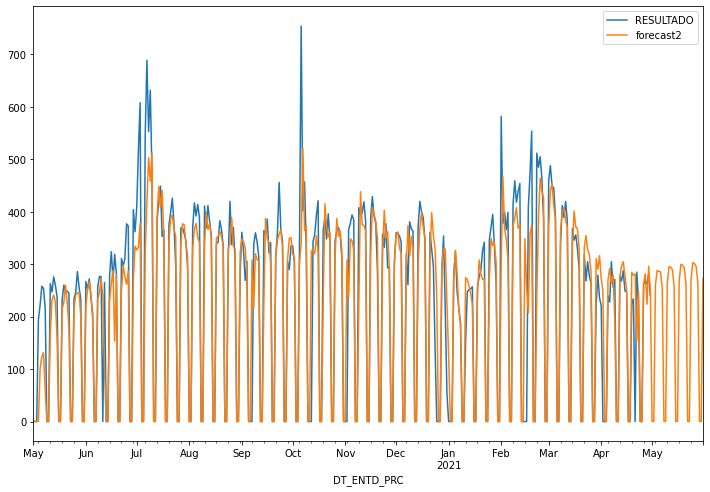

In [105]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [106]:
predictionsH=future_df.tail(31)
predictionsH["PRC"]="H"
predictionsH

PRC  RESULTADO  DayOfWeek   forecast2
DT_ENTD_PRC                                      
2021-05-01    H        NaN          5    0.000000
2021-05-02    H        NaN          6    0.000000
2021-05-03    H        NaN          0  260.936199
2021-05-04    H        NaN          1  288.378033
2021-05-05    H        NaN          2  286.147947
2021-05-06    H        NaN          3  285.667468
2021-05-07    H        NaN          4  253.244029
2021-05-08    H        NaN          5    0.000000
2021-05-09    H        NaN          6    0.000000
2021-05-10    H        NaN          0  264.448376
2021-05-11    H        NaN          1  295.572803
2021-05-12    H        NaN          2  294.171223
2021-05-13    H        NaN          3  289.431923
2021-05-14    H        NaN          4  258.679505
2021-05-15    H        NaN          5    0.000000
2021-05-16    H        NaN          6    0.000000
2021-05-17    H        NaN          0  267.889535
2021-05-18    H        NaN          1  299.683734
2021-05-19    H        NaN          2  298.385044
2021-05-20    H        NaN          3  292.717968
2021-05-21    H        NaN          4  262.252835
2021-05-22    H        NaN          5    0.000000
2021-05-23    H        NaN          6    0.000000
2021-05-24    H        NaN          0  270.875249
2021-05-25    H        NaN          1  302.737627
2021-05-26    H        NaN          2  301.404710
2021-05-27    H        NaN          3  295.496874
2021-05-28    H        NaN          4  265.047633
2021-05-29    H        NaN          5    0.000000
2021-05-30    H        NaN          6    0.000000
2021-05-31    H        NaN          0  273.396357

### Process I

In [107]:
dataI=df_aux[df_aux.PRC=="I"]
dataI.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   I        0.0          4
1  2020-05-02   I        0.0          5
2  2020-05-03   I        0.0          6
3  2020-05-04   I      228.0          0
4  2020-05-05   I      371.0          1

In [108]:
dataI.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataI["RESULTADO"])

ADF Test Statistic : -2.464753120583887
p-value : 0.12428745422294846
#Lags Used : 15
Number of Observations Used : 349
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [109]:

dataI['Result First Difference'] = dataI['RESULTADO'] - dataI['RESULTADO'].shift(7)
adfuller_test(dataI['Result First Difference'].dropna())

ADF Test Statistic : -3.9651995677881513
p-value : 0.001604109252038525
#Lags Used : 16
Number of Observations Used : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

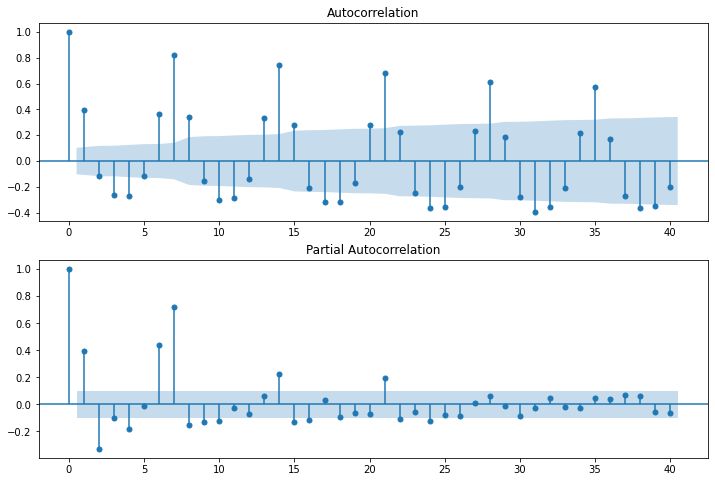

In [110]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataI['RESULTADO'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataI['RESULTADO'],lags=40,ax=ax2)

### P,D,Q = (4,1,1)

In [111]:
dataI

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    I        0.0          4                      NaN
2020-05-02    I        0.0          5                      NaN
2020-05-03    I        0.0          6                      NaN
2020-05-04    I      228.0          0                      NaN
2020-05-05    I      371.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    I      175.0          0                     12.0
2021-04-27    I      153.0          1                     -2.0
2021-04-28    I      191.0          2                    191.0
2021-04-29    I      161.0          3                    -21.0
2021-04-30    I      178.0          4                     46.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

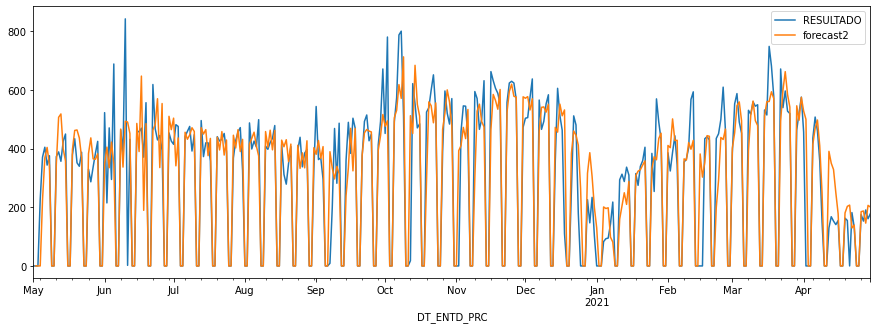

In [112]:
model1=sm.tsa.statespace.SARIMAX(dataI['RESULTADO'],order=(4, 1, 1),seasonal_order=(4,1,1,7),dynamic=True)
results=model1.fit()
dataI['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataI)):
    if dataI["DayOfWeek"].iloc[x]==5:
        dataI["forecast2"].iloc[x]=0
    if dataI["DayOfWeek"].iloc[x]==6:
        
        dataI["forecast2"].iloc[x]=0
dataI[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [113]:
mse = mean_squared_error(dataI["RESULTADO"][200:], dataI["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

102.90151840909306

### Creating dates to be predicted

In [114]:
future_dates=[dataI.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataI.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataI,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

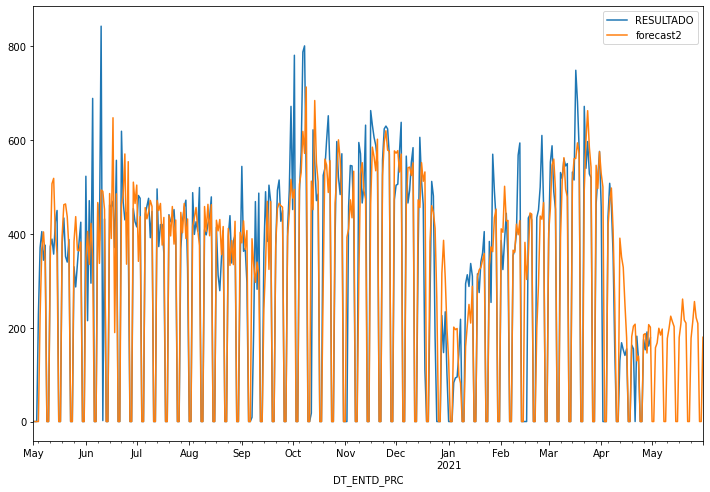

In [115]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [116]:
predictionsI=future_df.tail(31)
predictionsI["PRC"]="I"
predictionsI

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    I        NaN          5                      NaN    0.000000
2021-05-02    I        NaN          6                      NaN    0.000000
2021-05-03    I        NaN          0                      NaN  157.382210
2021-05-04    I        NaN          1                      NaN  167.667581
2021-05-05    I        NaN          2                      NaN  198.896030
2021-05-06    I        NaN          3                      NaN  184.332539
2021-05-07    I        NaN          4                      NaN  197.188264
2021-05-08    I        NaN          5                      NaN    0.000000
2021-05-09    I        NaN          6                      NaN    0.000000
2021-05-10    I        NaN          0                      NaN  177.168694
2021-05-11    I        NaN          1                      NaN  198.346718
2021-05-12    I        NaN          2                      NaN  224.646371
2021-05-13    I        NaN          3                      NaN  212.914789
2021-05-14    I        NaN          4                      NaN  202.426825
2021-05-15    I        NaN          5                      NaN    0.000000
2021-05-16    I        NaN          6                      NaN    0.000000
2021-05-17    I        NaN          0                      NaN  179.345420
2021-05-18    I        NaN          1                      NaN  208.142270
2021-05-19    I        NaN          2                      NaN  261.108422
2021-05-20    I        NaN          3                      NaN  216.218297
2021-05-21    I        NaN          4                      NaN  209.947055
2021-05-22    I        NaN          5                      NaN    0.000000
2021-05-23    I        NaN          6                      NaN    0.000000
2021-05-24    I        NaN          0                      NaN  177.627916
2021-05-25    I        NaN          1                      NaN  213.031245
2021-05-26    I        NaN          2                      NaN  255.844681
2021-05-27    I        NaN          3                      NaN  221.530410
2021-05-28    I        NaN          4                      NaN  209.157285
2021-05-29    I        NaN          5                      NaN    0.000000
2021-05-30    I        NaN          6                      NaN    0.000000
2021-05-31    I        NaN          0                      NaN  179.711178

### Process J

In [117]:
dataJ=df_aux[df_aux.PRC=="J"]
dataJ.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   J        8.0          4
1  2020-05-02   J        0.0          5
2  2020-05-03   J        0.0          6
3  2020-05-04   J      827.0          0
4  2020-05-05   J      777.0          1

In [118]:
dataJ.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataJ["RESULTADO"])

ADF Test Statistic : -2.670683093338803
p-value : 0.07925020919993897
#Lags Used : 14
Number of Observations Used : 350
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing


In [119]:
dataJ['Result First Difference'] = dataJ['RESULTADO'] - dataJ['RESULTADO'].shift(7)
adfuller_test(dataJ['Result First Difference'].dropna())

ADF Test Statistic : -5.010663167479398
p-value : 2.11396263085529e-05
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

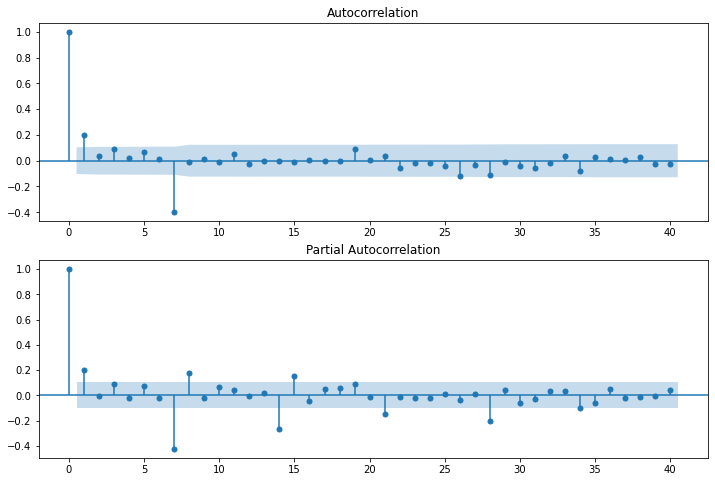

In [120]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataJ['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataJ['Result First Difference'].dropna(),lags=40,ax=ax2)

### P,D,Q= 1,1,1

In [121]:
dataJ

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    J        8.0          4                      NaN
2020-05-02    J        0.0          5                      NaN
2020-05-03    J        0.0          6                      NaN
2020-05-04    J      827.0          0                      NaN
2020-05-05    J      777.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    J     1417.0          0                    154.0
2021-04-27    J     1446.0          1                     32.0
2021-04-28    J     1745.0          2                   1745.0
2021-04-29    J     1486.0          3                   -642.0
2021-04-30    J     1347.0          4                     24.0

[365 rows x 4 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

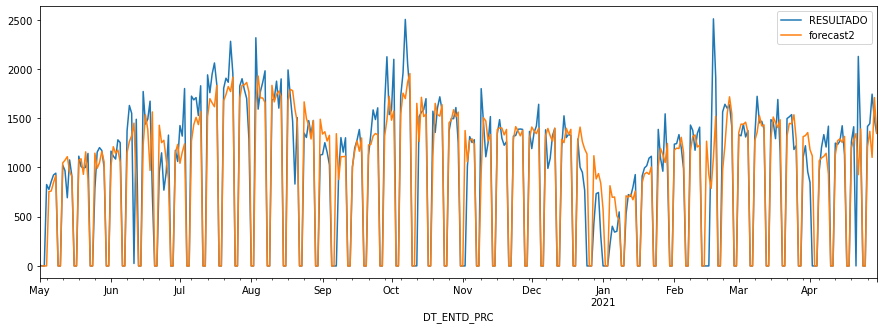

In [122]:
model1=sm.tsa.statespace.SARIMAX(dataJ['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataJ['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataJ)):
    if dataJ["DayOfWeek"].iloc[x]==5:
        dataJ["forecast2"].iloc[x]=0
    if dataJ["DayOfWeek"].iloc[x]==6:
        
        dataJ["forecast2"].iloc[x]=0
dataJ[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [123]:
mse = mean_squared_error(dataJ["RESULTADO"][200:], dataJ["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

316.537296518552

### Creating dates to be predicted

In [124]:
future_dates=[dataJ.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataJ.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataJ,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

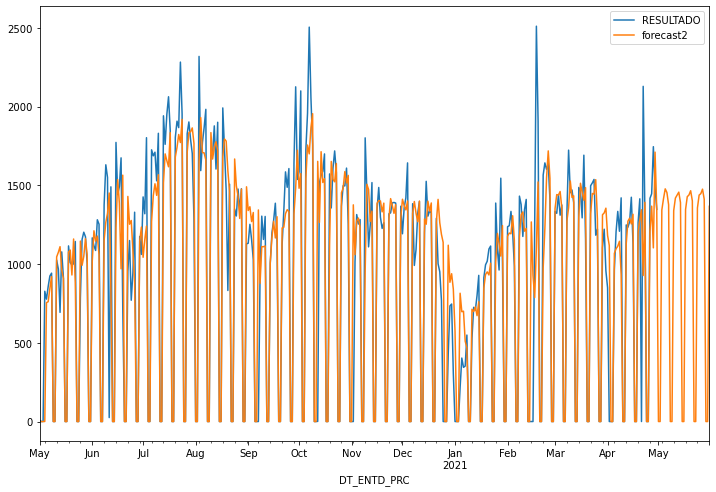

In [125]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [126]:
predictionsJ=future_df.tail(31)
predictionsJ["PRC"]="J"
predictionsJ

PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2
DT_ENTD_PRC                                                                
2021-05-01    J        NaN          5                      NaN     0.000000
2021-05-02    J        NaN          6                      NaN     0.000000
2021-05-03    J        NaN          0                      NaN  1343.546946
2021-05-04    J        NaN          1                      NaN  1415.638395
2021-05-05    J        NaN          2                      NaN  1477.227286
2021-05-06    J        NaN          3                      NaN  1453.763972
2021-05-07    J        NaN          4                      NaN  1376.084087
2021-05-08    J        NaN          5                      NaN     0.000000
2021-05-09    J        NaN          6                      NaN     0.000000
2021-05-10    J        NaN          0                      NaN  1338.785426
2021-05-11    J        NaN          1                      NaN  1418.599938
2021-05-12    J        NaN          2                      NaN  1437.034393
2021-05-13    J        NaN          3                      NaN  1456.359390
2021-05-14    J        NaN          4                      NaN  1389.819358
2021-05-15    J        NaN          5                      NaN     0.000000
2021-05-16    J        NaN          6                      NaN     0.000000
2021-05-17    J        NaN          0                      NaN  1346.371370
2021-05-18    J        NaN          1                      NaN  1427.589016
2021-05-19    J        NaN          2                      NaN  1438.183120
2021-05-20    J        NaN          3                      NaN  1465.281950
2021-05-21    J        NaN          4                      NaN  1400.765819
2021-05-22    J        NaN          5                      NaN     0.000000
2021-05-23    J        NaN          6                      NaN     0.000000
2021-05-24    J        NaN          0                      NaN  1356.200614
2021-05-25    J        NaN          1                      NaN  1437.673183
2021-05-26    J        NaN          2                      NaN  1446.842843
2021-05-27    J        NaN          3                      NaN  1475.354032
2021-05-28    J        NaN          4                      NaN  1411.205606
2021-05-29    J        NaN          5                      NaN     0.000000
2021-05-30    J        NaN          6                      NaN     0.000000
2021-05-31    J        NaN          0                      NaN  1366.437424

### Process K

In [127]:
dataK=df_aux[df_aux.PRC=="J"]
dataK.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   J        8.0          4
1  2020-05-02   J        0.0          5
2  2020-05-03   J        0.0          6
3  2020-05-04   J      827.0          0
4  2020-05-05   J      777.0          1

In [128]:
dataK.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataK["RESULTADO"])

ADF Test Statistic : -2.670683093338803
p-value : 0.07925020919993897
#Lags Used : 14
Number of Observations Used : 350
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [129]:
dataK['Result First Difference'] = dataK['RESULTADO'] - dataK['RESULTADO'].shift(7)
adfuller_test(dataK['Result First Difference'].dropna())

ADF Test Statistic : -5.010663167479398
p-value : 2.11396263085529e-05
#Lags Used : 14
Number of Observations Used : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

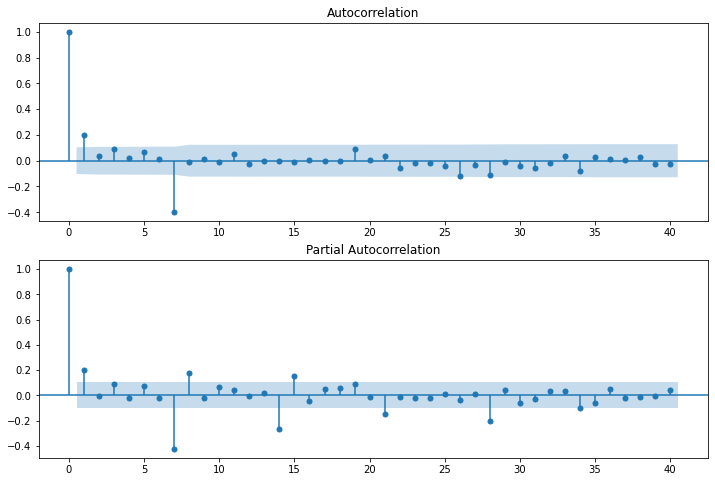

In [130]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataK['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataK['Result First Difference'].dropna(),lags=40,ax=ax2)

### PDQ = (1,1,1)

In [131]:
dataK

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    J        8.0          4                      NaN
2020-05-02    J        0.0          5                      NaN
2020-05-03    J        0.0          6                      NaN
2020-05-04    J      827.0          0                      NaN
2020-05-05    J      777.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    J     1417.0          0                    154.0
2021-04-27    J     1446.0          1                     32.0
2021-04-28    J     1745.0          2                   1745.0
2021-04-29    J     1486.0          3                   -642.0
2021-04-30    J     1347.0          4                     24.0

[365 rows x 4 columns]

### Running the Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

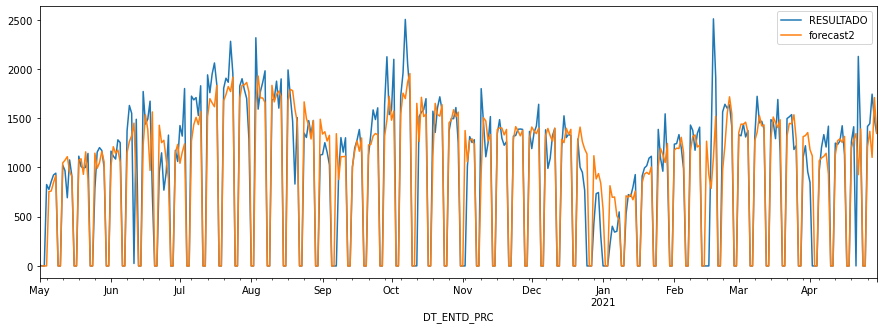

In [132]:
model1=sm.tsa.statespace.SARIMAX(dataK['RESULTADO'],order=(1, 1, 1),seasonal_order=(1,1,1,7),dynamic=True)
results=model1.fit()
dataK['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataK)):
    if dataK["DayOfWeek"].iloc[x]==5:
        dataK["forecast2"].iloc[x]=0
    if dataK["DayOfWeek"].iloc[x]==6:
        
        dataK["forecast2"].iloc[x]=0
dataK[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [133]:
mse = mean_squared_error(dataK["RESULTADO"][200:], dataK["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

316.537296518552

### Creating dates to be predicted

In [134]:
future_dates=[dataK.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataK.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataK,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

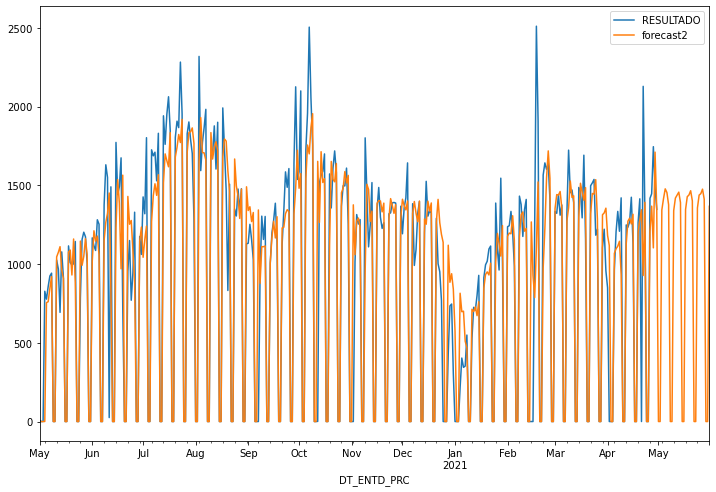

In [135]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [136]:
predictionsK=future_df.tail(31)
predictionsK["PRC"]="K"
predictionsK

PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2
DT_ENTD_PRC                                                                
2021-05-01    K        NaN          5                      NaN     0.000000
2021-05-02    K        NaN          6                      NaN     0.000000
2021-05-03    K        NaN          0                      NaN  1343.546946
2021-05-04    K        NaN          1                      NaN  1415.638395
2021-05-05    K        NaN          2                      NaN  1477.227286
2021-05-06    K        NaN          3                      NaN  1453.763972
2021-05-07    K        NaN          4                      NaN  1376.084087
2021-05-08    K        NaN          5                      NaN     0.000000
2021-05-09    K        NaN          6                      NaN     0.000000
2021-05-10    K        NaN          0                      NaN  1338.785426
2021-05-11    K        NaN          1                      NaN  1418.599938
2021-05-12    K        NaN          2                      NaN  1437.034393
2021-05-13    K        NaN          3                      NaN  1456.359390
2021-05-14    K        NaN          4                      NaN  1389.819358
2021-05-15    K        NaN          5                      NaN     0.000000
2021-05-16    K        NaN          6                      NaN     0.000000
2021-05-17    K        NaN          0                      NaN  1346.371370
2021-05-18    K        NaN          1                      NaN  1427.589016
2021-05-19    K        NaN          2                      NaN  1438.183120
2021-05-20    K        NaN          3                      NaN  1465.281950
2021-05-21    K        NaN          4                      NaN  1400.765819
2021-05-22    K        NaN          5                      NaN     0.000000
2021-05-23    K        NaN          6                      NaN     0.000000
2021-05-24    K        NaN          0                      NaN  1356.200614
2021-05-25    K        NaN          1                      NaN  1437.673183
2021-05-26    K        NaN          2                      NaN  1446.842843
2021-05-27    K        NaN          3                      NaN  1475.354032
2021-05-28    K        NaN          4                      NaN  1411.205606
2021-05-29    K        NaN          5                      NaN     0.000000
2021-05-30    K        NaN          6                      NaN     0.000000
2021-05-31    K        NaN          0                      NaN  1366.437424

### Process L

In [137]:
dataL=df_aux[df_aux.PRC=="L"]
dataL.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   L       51.0          4
1  2020-05-02   L        0.0          5
2  2020-05-03   L        0.0          6
3  2020-05-04   L     2412.0          0
4  2020-05-05   L      243.0          1

<AxesSubplot:>

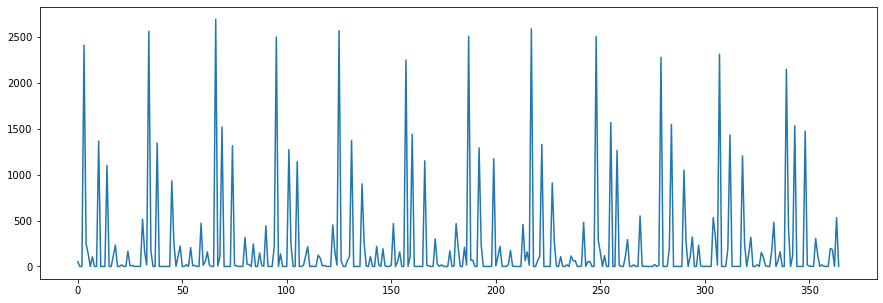

In [138]:
dataL["RESULTADO"].plot(figsize=(15,5))

In [139]:
dataL.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataL["RESULTADO"])

ADF Test Statistic : -8.209137940963789
p-value : 6.894031849698039e-13
#Lags Used : 17
Number of Observations Used : 347
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [140]:
dataL['Result First Difference'] = dataL['RESULTADO'] - dataL['RESULTADO'].shift(31)
adfuller_test(dataL['Result First Difference'].dropna())

ADF Test Statistic : -14.808836701178624
p-value : 2.0452387868993423e-27
#Lags Used : 4
Number of Observations Used : 329
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

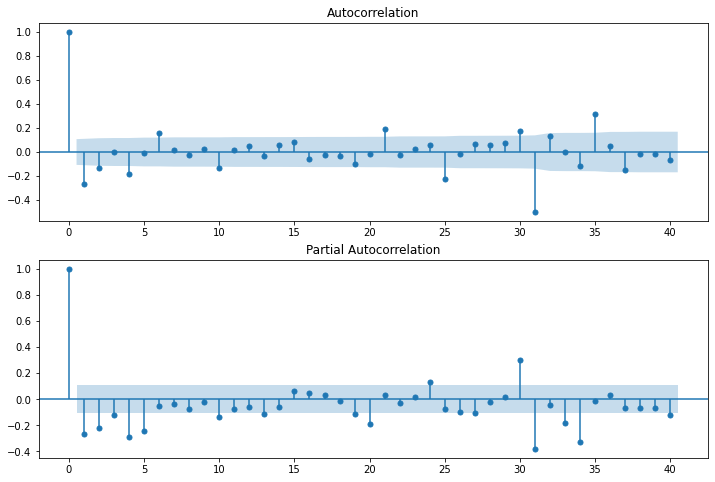

In [141]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataL['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataL['Result First Difference'].dropna(),lags=40,ax=ax2)

# PDQ = (5,1,0)

In [142]:
dataL[dataL.RESULTADO>1700]

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-04    L     2412.0          0                      NaN
2020-06-04    L     2562.0          3                    150.0
2020-07-06    L     2693.0          0                   2521.0
2020-08-04    L     2501.0          1                   2501.0
2020-09-03    L     2570.0          3                   2348.0
2020-10-05    L     2250.0          0                   2187.0
2020-11-04    L     2509.0          2                   2509.0
2020-12-04    L     2589.0          4                   2574.0
2021-01-04    L     2507.0          0                    -82.0
2021-02-04    L     2279.0          3                   -228.0
2021-03-04    L     2313.0          3                   2292.0
2021-04-05    L     2149.0          0                   2149.0

### Running Model


<AxesSubplot:xlabel='DT_ENTD_PRC'>

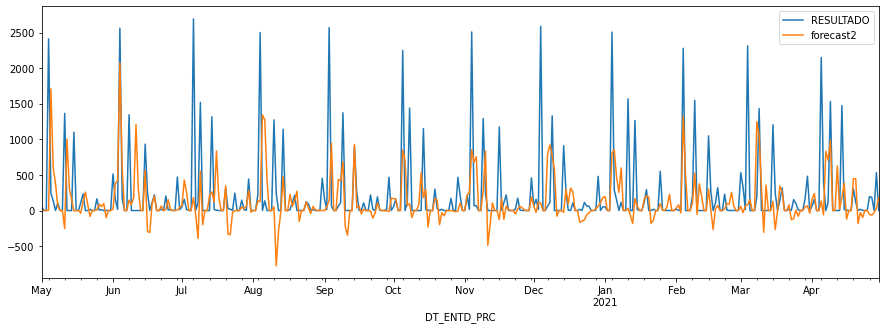

In [143]:
model1=sm.tsa.statespace.SARIMAX(dataL['RESULTADO'],order=(5,1, 0),seasonal_order=(5,1,0,31),dynamic=True)
results=model1.fit()
dataL['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataL)):
    if dataL["DayOfWeek"].iloc[x]==5:
        dataL["forecast2"].iloc[x]=0
    if dataL["DayOfWeek"].iloc[x]==6:
        
        dataL["forecast2"].iloc[x]=0
dataL[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [144]:
mse = mean_squared_error(dataL["RESULTADO"][200:], dataL["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

477.9840580340619

### Creating dates to be predicted

In [145]:
future_dates=[dataL.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataL.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataL,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

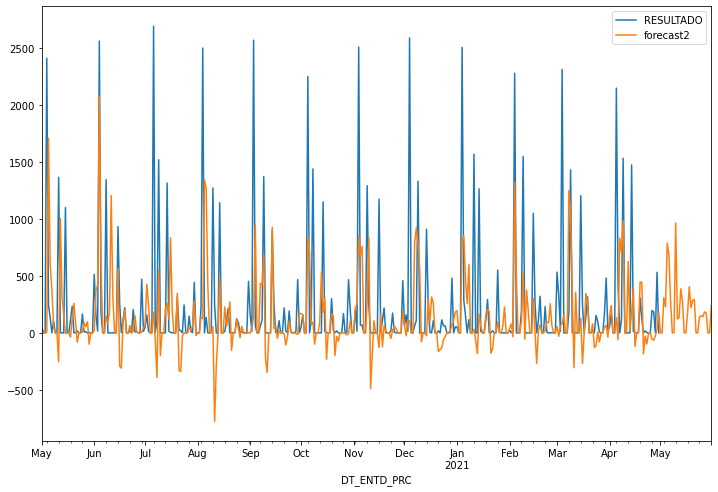

In [146]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [147]:
predictionsL=future_df.tail(31)
predictionsL["PRC"]="L"
predictionsL

PRC  RESULTADO  DayOfWeek  Result First Difference   forecast2
DT_ENTD_PRC                                                               
2021-05-01    L        NaN          5                      NaN    0.000000
2021-05-02    L        NaN          6                      NaN    0.000000
2021-05-03    L        NaN          0                      NaN  308.573425
2021-05-04    L        NaN          1                      NaN  228.705525
2021-05-05    L        NaN          2                      NaN  786.983914
2021-05-06    L        NaN          3                      NaN  682.631824
2021-05-07    L        NaN          4                      NaN  271.950777
2021-05-08    L        NaN          5                      NaN    0.000000
2021-05-09    L        NaN          6                      NaN    0.000000
2021-05-10    L        NaN          0                      NaN  964.906089
2021-05-11    L        NaN          1                      NaN  121.304541
2021-05-12    L        NaN          2                      NaN  132.865823
2021-05-13    L        NaN          3                      NaN  386.565487
2021-05-14    L        NaN          4                      NaN  279.591984
2021-05-15    L        NaN          5                      NaN    0.000000
2021-05-16    L        NaN          6                      NaN    0.000000
2021-05-17    L        NaN          0                      NaN  174.144245
2021-05-18    L        NaN          1                      NaN  404.624344
2021-05-19    L        NaN          2                      NaN  220.143629
2021-05-20    L        NaN          3                      NaN  288.083120
2021-05-21    L        NaN          4                      NaN  292.307248
2021-05-22    L        NaN          5                      NaN    0.000000
2021-05-23    L        NaN          6                      NaN    0.000000
2021-05-24    L        NaN          0                      NaN  136.224322
2021-05-25    L        NaN          1                      NaN  151.763467
2021-05-26    L        NaN          2                      NaN  140.665352
2021-05-27    L        NaN          3                      NaN  184.591216
2021-05-28    L        NaN          4                      NaN  172.952750
2021-05-29    L        NaN          5                      NaN    0.000000
2021-05-30    L        NaN          6                      NaN    0.000000
2021-05-31    L        NaN          0                      NaN  238.365781

### Process M

In [148]:
dataM=df_aux[df_aux.PRC=="M"]
dataM.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   M        0.0          4
1  2020-05-02   M        0.0          5
2  2020-05-03   M        0.0          6
3  2020-05-04   M      270.0          0
4  2020-05-05   M      416.0          1

In [149]:
dataM.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataM["RESULTADO"])

ADF Test Statistic : -3.2036286601205295
p-value : 0.019775596579443607
#Lags Used : 14
Number of Observations Used : 350
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

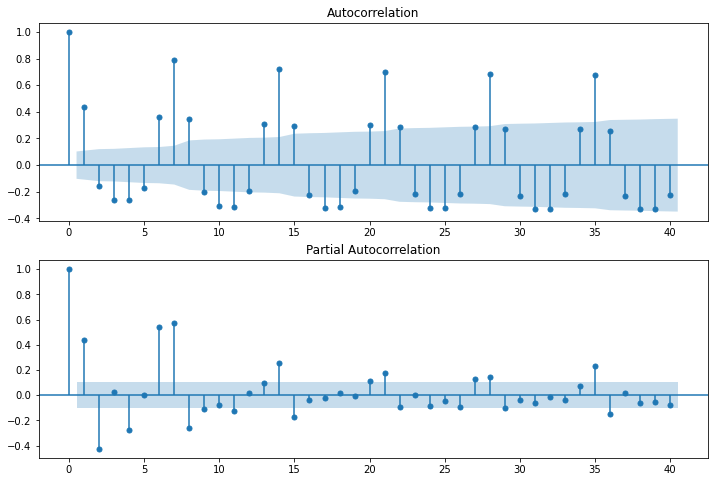

In [150]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataM['RESULTADO'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataM['RESULTADO'],lags=40,ax=ax2)

### PDQ=(2,0,1)

In [151]:
dataM

PRC  RESULTADO  DayOfWeek
DT_ENTD_PRC                          
2020-05-01    M        0.0          4
2020-05-02    M        0.0          5
2020-05-03    M        0.0          6
2020-05-04    M      270.0          0
2020-05-05    M      416.0          1
...          ..        ...        ...
2021-04-26    M      344.0          0
2021-04-27    M      445.0          1
2021-04-28    M      451.0          2
2021-04-29    M      552.0          3
2021-04-30    M      622.0          4

[365 rows x 3 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

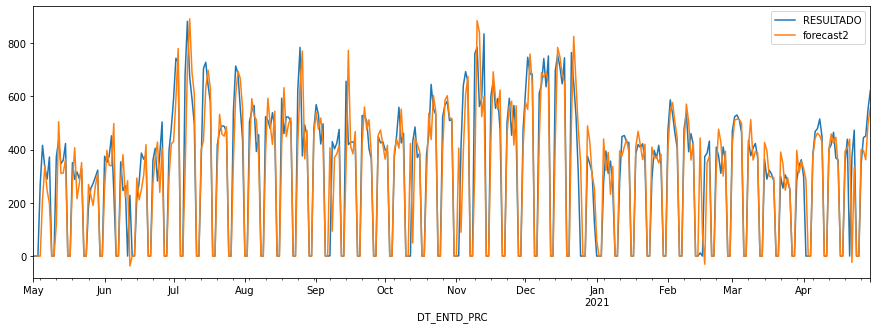

In [152]:
model1=sm.tsa.statespace.SARIMAX(dataM['RESULTADO'],order=(2,0, 1),seasonal_order=(2,0,1,7),dynamic=True)
results=model1.fit()
dataM['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataM)):
    if dataM["DayOfWeek"].iloc[x]==5:
        dataM["forecast2"].iloc[x]=0
    if dataM["DayOfWeek"].iloc[x]==6:
        
        dataM["forecast2"].iloc[x]=0
dataM[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [153]:
mse = mean_squared_error(dataM["RESULTADO"][200:], dataM["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

101.53186788818651

### Creating Dates to be predicted

In [154]:
future_dates=[dataM.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataM.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataM,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

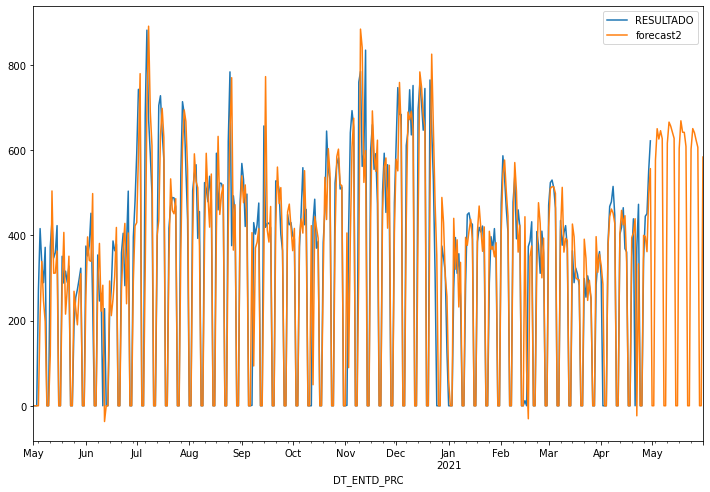

In [155]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [156]:
predictionsM=future_df.tail(31)
predictionsM["PRC"]="M"
predictionsM

PRC  RESULTADO  DayOfWeek   forecast2
DT_ENTD_PRC                                      
2021-05-01    M        NaN          5    0.000000
2021-05-02    M        NaN          6    0.000000
2021-05-03    M        NaN          0  576.433397
2021-05-04    M        NaN          1  650.585889
2021-05-05    M        NaN          2  626.253598
2021-05-06    M        NaN          3  645.863511
2021-05-07    M        NaN          4  627.119332
2021-05-08    M        NaN          5    0.000000
2021-05-09    M        NaN          6    0.000000
2021-05-10    M        NaN          0  616.425478
2021-05-11    M        NaN          1  666.038732
2021-05-12    M        NaN          2  656.505049
2021-05-13    M        NaN          3  642.081658
2021-05-14    M        NaN          4  627.952611
2021-05-15    M        NaN          5    0.000000
2021-05-16    M        NaN          6    0.000000
2021-05-17    M        NaN          0  603.710241
2021-05-18    M        NaN          1  669.104217
2021-05-19    M        NaN          2  642.301052
2021-05-20    M        NaN          3  642.012494
2021-05-21    M        NaN          4  608.839736
2021-05-22    M        NaN          5    0.000000
2021-05-23    M        NaN          6    0.000000
2021-05-24    M        NaN          0  602.502180
2021-05-25    M        NaN          1  650.781168
2021-05-26    M        NaN          2  641.024176
2021-05-27    M        NaN          3  623.346194
2021-05-28    M        NaN          4  606.907767
2021-05-29    M        NaN          5    0.000000
2021-05-30    M        NaN          6    0.000000
2021-05-31    M        NaN          0  584.027274

### Process N

In [157]:
dataN=df_aux[df_aux.PRC=="N"]
dataN.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   N        2.0          4
1  2020-05-02   N        0.0          5
2  2020-05-03   N        0.0          6
3  2020-05-04   N      137.0          0
4  2020-05-05   N      192.0          1

In [158]:
dataN.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataN["RESULTADO"])

ADF Test Statistic : -3.330642178466708
p-value : 0.013563109305643218
#Lags Used : 14
Number of Observations Used : 350
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

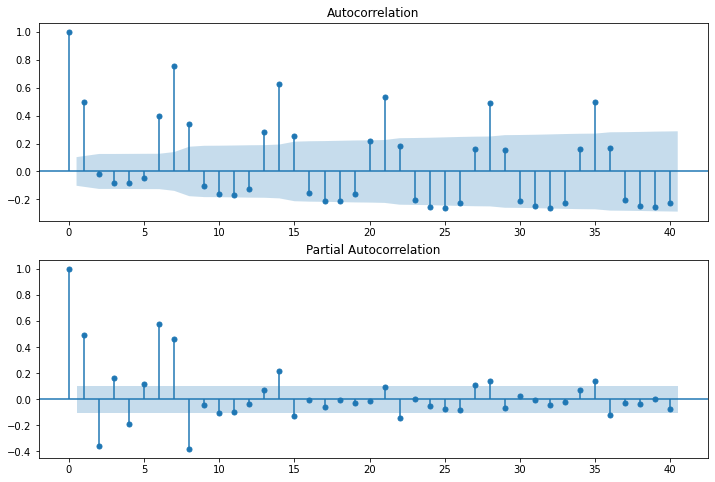

In [159]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataN['RESULTADO'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataN['RESULTADO'],lags=40,ax=ax2)

### PDQ = 5,0,1

In [160]:
dataN

PRC  RESULTADO  DayOfWeek
DT_ENTD_PRC                          
2020-05-01    N        2.0          4
2020-05-02    N        0.0          5
2020-05-03    N        0.0          6
2020-05-04    N      137.0          0
2020-05-05    N      192.0          1
...          ..        ...        ...
2021-04-26    N      413.0          0
2021-04-27    N      379.0          1
2021-04-28    N      369.0          2
2021-04-29    N      359.0          3
2021-04-30    N      338.0          4

[365 rows x 3 columns]

### Running Model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

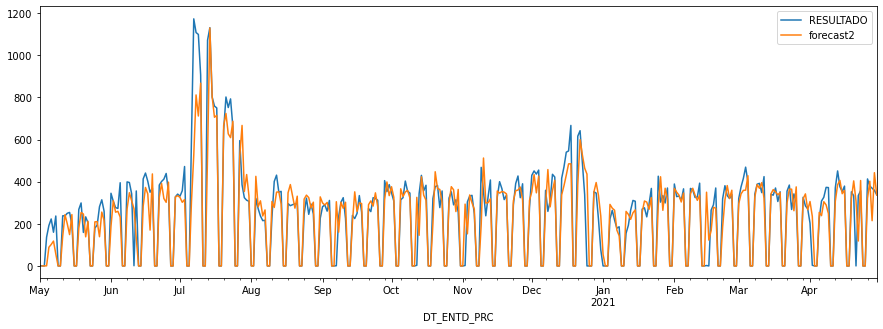

In [161]:
model1=sm.tsa.statespace.SARIMAX(dataN['RESULTADO'],order=(5,0, 1),seasonal_order=(5,0,1,7),dynamic=True)
results=model1.fit()
dataN['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataN)):
    if dataN["DayOfWeek"].iloc[x]==5:
        dataN["forecast2"].iloc[x]=0
    if dataN["DayOfWeek"].iloc[x]==6:
        
        dataN["forecast2"].iloc[x]=0
dataN[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [162]:
mse = mean_squared_error(dataN["RESULTADO"][200:], dataN["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

80.9079248526915

### Creating Dates to be predicted

In [163]:
future_dates=[dataN.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataN.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataN,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

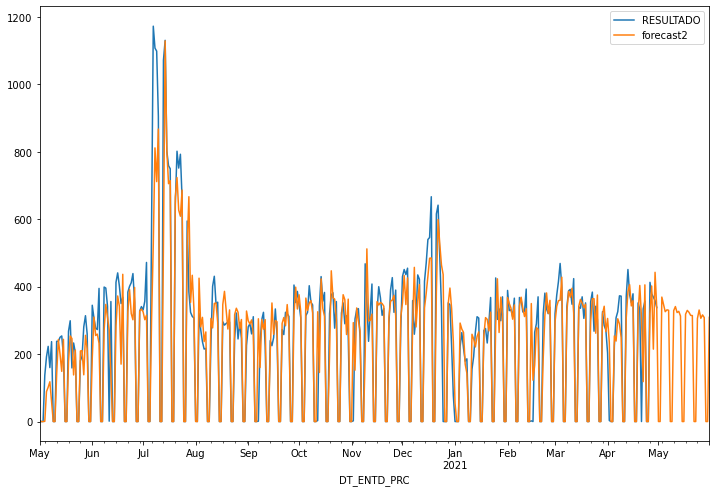

In [164]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [165]:
predictionsN=future_df.tail(31)
predictionsN["PRC"]="N"
predictionsN

PRC  RESULTADO  DayOfWeek   forecast2
DT_ENTD_PRC                                      
2021-05-01    N        NaN          5    0.000000
2021-05-02    N        NaN          6    0.000000
2021-05-03    N        NaN          0  369.231086
2021-05-04    N        NaN          1  347.766772
2021-05-05    N        NaN          2  325.919435
2021-05-06    N        NaN          3  331.429870
2021-05-07    N        NaN          4  330.139495
2021-05-08    N        NaN          5    0.000000
2021-05-09    N        NaN          6    0.000000
2021-05-10    N        NaN          0  329.081789
2021-05-11    N        NaN          1  341.149617
2021-05-12    N        NaN          2  323.397812
2021-05-13    N        NaN          3  326.876448
2021-05-14    N        NaN          4  312.990764
2021-05-15    N        NaN          5    0.000000
2021-05-16    N        NaN          6    0.000000
2021-05-17    N        NaN          0  318.336495
2021-05-18    N        NaN          1  329.746824
2021-05-19    N        NaN          2  324.202025
2021-05-20    N        NaN          3  314.931808
2021-05-21    N        NaN          4  314.409988
2021-05-22    N        NaN          5    0.000000
2021-05-23    N        NaN          6    0.000000
2021-05-24    N        NaN          0  305.674689
2021-05-25    N        NaN          1  330.897055
2021-05-26    N        NaN          2  306.260607
2021-05-27    N        NaN          3  316.405398
2021-05-28    N        NaN          4  308.509489
2021-05-29    N        NaN          5    0.000000
2021-05-30    N        NaN          6    0.000000
2021-05-31    N        NaN          0  309.125777

### Process O

In [166]:
dataO=df_aux[df_aux.PRC=="O"]
dataO.head()

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek
0  2020-05-01   O        0.0          4
1  2020-05-02   O        0.0          5
2  2020-05-03   O        0.0          6
3  2020-05-04   O        0.0          0
4  2020-05-05   O        0.0          1

In [167]:
dataO.set_index("DT_ENTD_PRC", inplace=True)
adfuller_test(dataO["RESULTADO"])

ADF Test Statistic : -2.3503760989987983
p-value : 0.1562347505324458
#Lags Used : 13
Number of Observations Used : 351
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [168]:
dataO['Result First Difference'] = dataO['RESULTADO'] - dataO['RESULTADO'].shift(7)
adfuller_test(dataO['Result First Difference'].dropna())

ADF Test Statistic : -6.704750350937055
p-value : 3.810039479367231e-09
#Lags Used : 8
Number of Observations Used : 349
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Finding P,D,Q

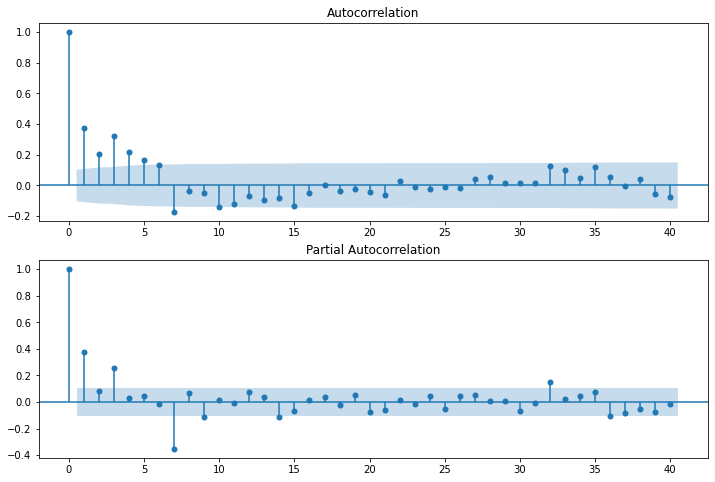

In [169]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataO['Result First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataO['Result First Difference'].dropna(),lags=40,ax=ax2)

### PDQ = 1,1,6

In [170]:
dataO

PRC  RESULTADO  DayOfWeek  Result First Difference
DT_ENTD_PRC                                                   
2020-05-01    O        0.0          4                      NaN
2020-05-02    O        0.0          5                      NaN
2020-05-03    O        0.0          6                      NaN
2020-05-04    O        0.0          0                      NaN
2020-05-05    O        0.0          1                      NaN
...          ..        ...        ...                      ...
2021-04-26    O        0.0          0                      0.0
2021-04-27    O     1945.0          1                   1945.0
2021-04-28    O      181.0          2                    181.0
2021-04-29    O      171.0          3                    171.0
2021-04-30    O      168.0          4                    168.0

[365 rows x 4 columns]

### Running model

<AxesSubplot:xlabel='DT_ENTD_PRC'>

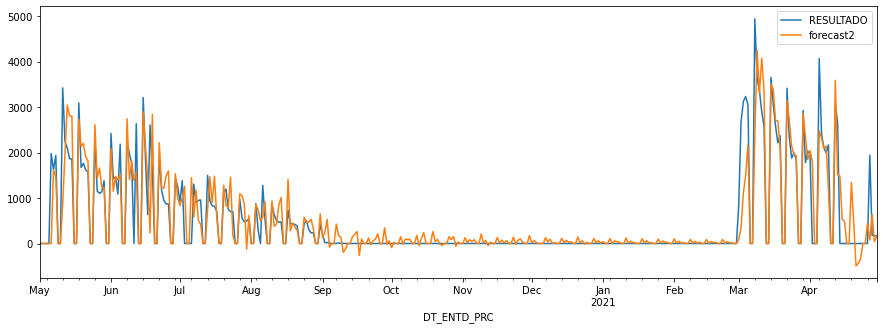

In [171]:
model1=sm.tsa.statespace.SARIMAX(dataO['RESULTADO'],order=(1,1, 6),seasonal_order=(1,1,6,7),dynamic=True)
results=model1.fit()
dataO['forecast2']=results.predict(start=1,end=364)
for x in range(len(dataO)):
    if dataO["DayOfWeek"].iloc[x]==5:
        dataO["forecast2"].iloc[x]=0
    if dataO["DayOfWeek"].iloc[x]==6:
        
        dataO["forecast2"].iloc[x]=0
dataO[['RESULTADO','forecast2']].plot(figsize=(15,5))

### Evaluating

In [172]:
mse = mean_squared_error(dataO["RESULTADO"][200:], dataO["forecast2"][200:])
rmse = ma.sqrt(mse)
rmse

502.93602314297266

### Creating Dates to be Predicted

In [173]:
future_dates=[dataO.index[-1]+ DateOffset(days=x)for x in range(0,32)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataO.columns)
future_datest_df=future_datest_df.reset_index()

future_datest_df.columns=["DT_ENTD_PRC","PRC","RESULTADO","DayOfWeek","Result First Difference","forecast2"]


future_datest_df["DayOfWeek"]=future_datest_df.DT_ENTD_PRC.apply(lambda x :x.weekday())

future_datest_df.set_index("DT_ENTD_PRC", inplace=True)

future_df=pd.concat([dataO,future_datest_df])

### Predicting

<AxesSubplot:xlabel='DT_ENTD_PRC'>

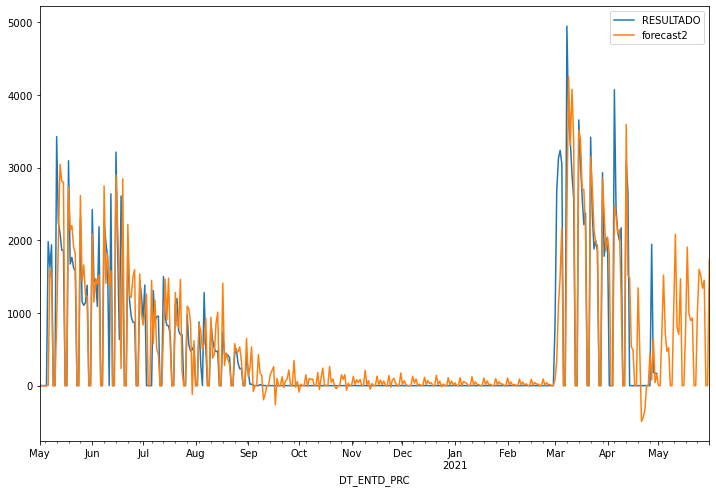

In [174]:
future_df['forecast2'] = results.predict(start = 1, end = 395)  
for x in range(len(future_df)):
    if future_df["DayOfWeek"].iloc[x]==5:
        future_df["forecast2"].iloc[x]=0
    if future_df["DayOfWeek"].iloc[x]==6:
        future_df["forecast2"].iloc[x]=0
        
future_df[['RESULTADO', 'forecast2']].plot(figsize=(12, 8))

In [175]:
predictionsO=future_df.tail(31)
predictionsO["PRC"]="O"
predictionsO

PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2
DT_ENTD_PRC                                                                
2021-05-01    O        NaN          5                      NaN     0.000000
2021-05-02    O        NaN          6                      NaN     0.000000
2021-05-03    O        NaN          0                      NaN   727.496618
2021-05-04    O        NaN          1                      NaN  1519.667203
2021-05-05    O        NaN          2                      NaN   729.868789
2021-05-06    O        NaN          3                      NaN   471.366556
2021-05-07    O        NaN          4                      NaN   522.783093
2021-05-08    O        NaN          5                      NaN     0.000000
2021-05-09    O        NaN          6                      NaN     0.000000
2021-05-10    O        NaN          0                      NaN  1012.922854
2021-05-11    O        NaN          1                      NaN  2081.080112
2021-05-12    O        NaN          2                      NaN   800.023965
2021-05-13    O        NaN          3                      NaN   705.733850
2021-05-14    O        NaN          4                      NaN  1470.464548
2021-05-15    O        NaN          5                      NaN     0.000000
2021-05-16    O        NaN          6                      NaN     0.000000
2021-05-17    O        NaN          0                      NaN   751.157401
2021-05-18    O        NaN          1                      NaN  1906.507472
2021-05-19    O        NaN          2                      NaN   990.102151
2021-05-20    O        NaN          3                      NaN   895.915474
2021-05-21    O        NaN          4                      NaN   931.146832
2021-05-22    O        NaN          5                      NaN     0.000000
2021-05-23    O        NaN          6                      NaN     0.000000
2021-05-24    O        NaN          0                      NaN  1026.961439
2021-05-25    O        NaN          1                      NaN  1599.657928
2021-05-26    O        NaN          2                      NaN  1508.330636
2021-05-27    O        NaN          3                      NaN  1340.480116
2021-05-28    O        NaN          4                      NaN  1450.335556
2021-05-29    O        NaN          5                      NaN     0.000000
2021-05-30    O        NaN          6                      NaN     0.000000
2021-05-31    O        NaN          0                      NaN  1736.199449

### gathering results and preparing the final data

In [176]:

final_df=pd.concat([predictionsA,predictionsB,predictionsC,predictionsD,predictionsE,predictionsF,predictionsG,predictionsH,predictionsI,predictionsJ,predictionsK,predictionsL,predictionsM,predictionsN,predictionsO])
final_df=final_df.reset_index()



In [177]:
final_df

DT_ENTD_PRC PRC  RESULTADO  DayOfWeek  Result First Difference  \
0    2021-05-01   A        NaN          5                      NaN   
1    2021-05-02   A        NaN          6                      NaN   
2    2021-05-03   A        NaN          0                      NaN   
3    2021-05-04   A        NaN          1                      NaN   
4    2021-05-05   A        NaN          2                      NaN   
..          ...  ..        ...        ...                      ...   
460  2021-05-27   O        NaN          3                      NaN   
461  2021-05-28   O        NaN          4                      NaN   
462  2021-05-29   O        NaN          5                      NaN   
463  2021-05-30   O        NaN          6                      NaN   
464  2021-05-31   O        NaN          0                      NaN   

       forecast2  
0       0.000000  
1       0.000000  
2     481.857522  
3     517.052630  
4     434.463166  
..           ...  
460  1340.480116  
461  1450.335556  
462     0.000000  
463     0.000000  
464  1736.199449  

[465 rows x 6 columns]

In [178]:
final_df=final_df.sort_values(["DT_ENTD_PRC","PRC"])
final_df.set_index("DT_ENTD_PRC", inplace=True)


final_df.head(60)


PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2
DT_ENTD_PRC                                                                
2021-05-01    A        NaN          5                      NaN     0.000000
2021-05-01    B        NaN          5                      NaN     0.000000
2021-05-01    C        NaN          5                      NaN     0.000000
2021-05-01    D        NaN          5                      NaN     0.000000
2021-05-01    E        NaN          5                      NaN     0.000000
2021-05-01    F        NaN          5                      NaN     0.000000
2021-05-01    G        NaN          5                      NaN     0.000000
2021-05-01    H        NaN          5                      NaN     0.000000
2021-05-01    I        NaN          5                      NaN     0.000000
2021-05-01    J        NaN          5                      NaN     0.000000
2021-05-01    K        NaN          5                      NaN     0.000000
2021-05-01    L        NaN          5                      NaN     0.000000
2021-05-01    M        NaN          5                      NaN     0.000000
2021-05-01    N        NaN          5                      NaN     0.000000
2021-05-01    O        NaN          5                      NaN     0.000000
2021-05-02    A        NaN          6                      NaN     0.000000
2021-05-02    B        NaN          6                      NaN     0.000000
2021-05-02    C        NaN          6                      NaN     0.000000
2021-05-02    D        NaN          6                      NaN     0.000000
2021-05-02    E        NaN          6                      NaN     0.000000
2021-05-02    F        NaN          6                      NaN     0.000000
2021-05-02    G        NaN          6                      NaN     0.000000
2021-05-02    H        NaN          6                      NaN     0.000000
2021-05-02    I        NaN          6                      NaN     0.000000
2021-05-02    J        NaN          6                      NaN     0.000000
2021-05-02    K        NaN          6                      NaN     0.000000
2021-05-02    L        NaN          6                      NaN     0.000000
2021-05-02    M        NaN          6                      NaN     0.000000
2021-05-02    N        NaN          6                      NaN     0.000000
2021-05-02    O        NaN          6                      NaN     0.000000
2021-05-03    A        NaN          0                      NaN   481.857522
2021-05-03    B        NaN          0                      NaN   292.948778
2021-05-03    C        NaN          0                      NaN   454.344034
2021-05-03    D        NaN          0                      NaN   261.363035
2021-05-03    E        NaN          0                      NaN   211.685893
2021-05-03    F        NaN          0                      NaN   252.926192
2021-05-03    G        NaN          0                      NaN   498.418039
2021-05-03    H        NaN          0                      NaN   260.936199
2021-05-03    I        NaN          0                      NaN   157.382210
2021-05-03    J        NaN          0                      NaN  1343.546946
2021-05-03    K        NaN          0                      NaN  1343.546946
2021-05-03    L        NaN          0                      NaN   308.573425
2021-05-03    M        NaN          0                      NaN   576.433397
2021-05-03    N        NaN          0                      NaN   369.231086
2021-05-03    O        NaN          0                      NaN   727.496618
2021-05-04    A        NaN          1                      NaN   517.052630
2021-05-04    B        NaN          1                      NaN   331.187274
2021-05-04    C        NaN          1                      NaN   559.014320
2021-05-04    D        NaN          1                      NaN   282.459859
2021-05-04    E        NaN          1                      NaN   218.070208
2021-05-04    F        NaN          1                      N

In [179]:
data.tail()

PRC  RESULTADO DT_ENTD_PRC
3595   J       1347  2021-04-30
3596   K       1359  2021-04-30
3597   M        622  2021-04-30
3598   N        338  2021-04-30
3599   O        168  2021-04-30

In [180]:
final_df["ID"]=0

In [181]:
for x in range(len(final_df)):
    final_df["ID"].iloc[x]=(3601+x)

In [182]:
final_df.head(10)

PRC  RESULTADO  DayOfWeek  Result First Difference  forecast2  \
DT_ENTD_PRC                                                                 
2021-05-01    A        NaN          5                      NaN        0.0   
2021-05-01    B        NaN          5                      NaN        0.0   
2021-05-01    C        NaN          5                      NaN        0.0   
2021-05-01    D        NaN          5                      NaN        0.0   
2021-05-01    E        NaN          5                      NaN        0.0   
2021-05-01    F        NaN          5                      NaN        0.0   
2021-05-01    G        NaN          5                      NaN        0.0   
2021-05-01    H        NaN          5                      NaN        0.0   
2021-05-01    I        NaN          5                      NaN        0.0   
2021-05-01    J        NaN          5                      NaN        0.0   

               ID  
DT_ENTD_PRC        
2021-05-01   3601  
2021-05-01   3602  
2021-05-01   3603  
2021-05-01   3604  
2021-05-01   3605  
2021-05-01   3606  
2021-05-01   3607  
2021-05-01   3608  
2021-05-01   3609  
2021-05-01   3610

In [183]:
final_df.tail(10)

PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2  \
DT_ENTD_PRC                                                                   
2021-05-31    F        NaN          0                      NaN   249.032566   
2021-05-31    G        NaN          0                      NaN   503.474109   
2021-05-31    H        NaN          0                      NaN   273.396357   
2021-05-31    I        NaN          0                      NaN   179.711178   
2021-05-31    J        NaN          0                      NaN  1366.437424   
2021-05-31    K        NaN          0                      NaN  1366.437424   
2021-05-31    L        NaN          0                      NaN   238.365781   
2021-05-31    M        NaN          0                      NaN   584.027274   
2021-05-31    N        NaN          0                      NaN   309.125777   
2021-05-31    O        NaN          0                      NaN  1736.199449   

               ID  
DT_ENTD_PRC        
2021-05-31   4056  
2021-05-31   4057  
2021-05-31   4058  
2021-05-31   4059  
2021-05-31   4060  
2021-05-31   4061  
2021-05-31   4062  
2021-05-31   4063  
2021-05-31   4064  
2021-05-31   4065

In [184]:
final=final_df[["ID","forecast2"]]

In [185]:
final

ID    forecast2
DT_ENTD_PRC                   
2021-05-01   3601     0.000000
2021-05-01   3602     0.000000
2021-05-01   3603     0.000000
2021-05-01   3604     0.000000
2021-05-01   3605     0.000000
...           ...          ...
2021-05-31   4061  1366.437424
2021-05-31   4062   238.365781
2021-05-31   4063   584.027274
2021-05-31   4064   309.125777
2021-05-31   4065  1736.199449

[465 rows x 2 columns]

In [186]:
def arredonda(a):
    return round(a,0)

In [187]:
for x in range(len(final)):
    final["forecast2"].iloc[x]=arredonda(final["forecast2"].iloc[x])

In [188]:
final.tail(10)

ID  forecast2
DT_ENTD_PRC                 
2021-05-31   4056      249.0
2021-05-31   4057      503.0
2021-05-31   4058      273.0
2021-05-31   4059      180.0
2021-05-31   4060     1366.0
2021-05-31   4061     1366.0
2021-05-31   4062      238.0
2021-05-31   4063      584.0
2021-05-31   4064      309.0
2021-05-31   4065     1736.0

In [189]:
final.forecast2 = final.forecast2.astype(int)

In [190]:
final.tail(10)

ID  forecast2
DT_ENTD_PRC                 
2021-05-31   4056        249
2021-05-31   4057        503
2021-05-31   4058        273
2021-05-31   4059        180
2021-05-31   4060       1366
2021-05-31   4061       1366
2021-05-31   4062        238
2021-05-31   4063        584
2021-05-31   4064        309
2021-05-31   4065       1736

In [191]:
final.columns = ["ID","VALOR"]
final


ID  VALOR
DT_ENTD_PRC             
2021-05-01   3601      0
2021-05-01   3602      0
2021-05-01   3603      0
2021-05-01   3604      0
2021-05-01   3605      0
...           ...    ...
2021-05-31   4061   1366
2021-05-31   4062    238
2021-05-31   4063    584
2021-05-31   4064    309
2021-05-31   4065   1736

[465 rows x 2 columns]

In [192]:
final.to_csv("resposta.csv" ,sep=";", index=False)

In [193]:

final_df.head(60)


PRC  RESULTADO  DayOfWeek  Result First Difference    forecast2  \
DT_ENTD_PRC                                                                   
2021-05-01    A        NaN          5                      NaN     0.000000   
2021-05-01    B        NaN          5                      NaN     0.000000   
2021-05-01    C        NaN          5                      NaN     0.000000   
2021-05-01    D        NaN          5                      NaN     0.000000   
2021-05-01    E        NaN          5                      NaN     0.000000   
2021-05-01    F        NaN          5                      NaN     0.000000   
2021-05-01    G        NaN          5                      NaN     0.000000   
2021-05-01    H        NaN          5                      NaN     0.000000   
2021-05-01    I        NaN          5                      NaN     0.000000   
2021-05-01    J        NaN          5                      NaN     0.000000   
2021-05-01    K        NaN          5                      NaN     0.000000   
2021-05-01    L        NaN          5                      NaN     0.000000   
2021-05-01    M        NaN          5                      NaN     0.000000   
2021-05-01    N        NaN          5                      NaN     0.000000   
2021-05-01    O        NaN          5                      NaN     0.000000   
2021-05-02    A        NaN          6                      NaN     0.000000   
2021-05-02    B        NaN          6                      NaN     0.000000   
2021-05-02    C        NaN          6                      NaN     0.000000   
2021-05-02    D        NaN          6                      NaN     0.000000   
2021-05-02    E        NaN          6                      NaN     0.000000   
2021-05-02    F        NaN          6                      NaN     0.000000   
2021-05-02    G        NaN          6                      NaN     0.000000   
2021-05-02    H        NaN          6                      NaN     0.000000   
2021-05-02    I        NaN          6                      NaN     0.000000   
2021-05-02    J        NaN          6                      NaN     0.000000   
2021-05-02    K        NaN          6                      NaN     0.000000   
2021-05-02    L        NaN          6                      NaN     0.000000   
2021-05-02    M        NaN          6                      NaN     0.000000   
2021-05-02    N        NaN          6                      NaN     0.000000   
2021-05-02    O        NaN          6                      NaN     0.000000   
2021-05-03    A        NaN          0                      NaN   481.857522   
2021-05-03    B        NaN          0                      NaN   292.948778   
2021-05-03    C        NaN          0                      NaN   454.344034   
2021-05-03    D        NaN          0                      NaN   261.363035   
2021-05-03    E        NaN          0                      NaN   211.685893   
2021-05-03    F        NaN          0                      NaN   252.926192   
2021-05-03    G        NaN          0                      NaN   498.418039   
2021-05-03    H        NaN          0                      NaN   260.936199   
2021-05-03    I        NaN          0                      NaN   157.382210   
2021-05-03    J        NaN          0                      NaN  1343.546946   
2021-05-03    K        NaN          0                      NaN  1343.546946   
2021-05-03    L        NaN          0                      NaN   308.573425   
2021-05-03    M        NaN          0                      NaN   576.433397   
2021-05-03    N        NaN          0                      NaN   369.231086   
2021-05-03    O        NaN          0                      NaN   727.496618   
2021-05-04    A        NaN          1                      NaN   517.052630   
2021-05-04    B        NaN          1                      NaN   331.187274   
2021-05-04    C        NaN          1                      NaN   559.014320   
2021-05-04    D        NaN          1                      NaN

In [257]:

model = pd.read_csv("X_formatado.csv", sep=";")
model



ID PRC DT_ENTD_PRC
0      1   A  03/05/2021
1      2   B  03/05/2021
2      3   C  03/05/2021
3      4   D  03/05/2021
4      5   E  03/05/2021
..   ...  ..         ...
303  304   K  31/05/2021
304  305   L  31/05/2021
305  306   M  31/05/2021
306  307   N  31/05/2021
307  308   O  31/05/2021

[308 rows x 3 columns]

In [258]:
model.columns=['ID','PRC','DT_STRG']
model["DATA"] = pd.to_datetime(model.DT_STRG, format="%d/%m/%Y")

model.drop(columns="DT_STRG", inplace=True)
model.columns=['ID','PRC','DT_ENTD_PRC']

model

ID PRC DT_ENTD_PRC
0      1   A  2021-05-03
1      2   B  2021-05-03
2      3   C  2021-05-03
3      4   D  2021-05-03
4      5   E  2021-05-03
..   ...  ..         ...
303  304   K  2021-05-31
304  305   L  2021-05-31
305  306   M  2021-05-31
306  307   N  2021-05-31
307  308   O  2021-05-31

[308 rows x 3 columns]

In [259]:
model['DT_ENTD_PRC']=model.DT_ENTD_PRC.apply(lambda x :x.strftime("%m/%d/%Y, %H:%M:%S"))




In [260]:
final_df['DT_ENTD_PRC']=final_df.DT_ENTD_PRC.apply(lambda x :x.strftime("%m/%d/%Y"))

AttributeError: 'str' object has no attribute 'strftime'

In [261]:
type(final_df["PRC"].iloc[0])


str

In [262]:
model

ID PRC           DT_ENTD_PRC
0      1   A  05/03/2021, 00:00:00
1      2   B  05/03/2021, 00:00:00
2      3   C  05/03/2021, 00:00:00
3      4   D  05/03/2021, 00:00:00
4      5   E  05/03/2021, 00:00:00
..   ...  ..                   ...
303  304   K  05/31/2021, 00:00:00
304  305   L  05/31/2021, 00:00:00
305  306   M  05/31/2021, 00:00:00
306  307   N  05/31/2021, 00:00:00
307  308   O  05/31/2021, 00:00:00

[308 rows x 3 columns]

In [263]:
final_df

DT_ENTD_PRC  level_0  index PRC  RESULTADO  DayOfWeek  \
0    05/01/2021, 00:00:00        0      0   A        NaN          5   
1    05/01/2021, 00:00:00        1      1   B        NaN          5   
2    05/01/2021, 00:00:00        2      2   C        NaN          5   
3    05/01/2021, 00:00:00        3      3   D        NaN          5   
4    05/01/2021, 00:00:00        4      4   E        NaN          5   
..                    ...      ...    ...  ..        ...        ...   
460  05/31/2021, 00:00:00      460    460   K        NaN          0   
461  05/31/2021, 00:00:00      461    461   L        NaN          0   
462  05/31/2021, 00:00:00      462    462   M        NaN          0   
463  05/31/2021, 00:00:00      463    463   N        NaN          0   
464  05/31/2021, 00:00:00      464    464   O        NaN          0   

     Result First Difference    forecast2    ID  
0                        NaN     0.000000  3601  
1                        NaN     0.000000  3602  
2                        NaN     0.000000  3603  
3                        NaN     0.000000  3604  
4                        NaN     0.000000  3605  
..                       ...          ...   ...  
460                      NaN  1366.437424  4061  
461                      NaN   238.365781  4062  
462                      NaN   584.027274  4063  
463                      NaN   309.125777  4064  
464                      NaN  1736.199449  4065  

[465 rows x 9 columns]

In [265]:
          
 result=model.merge(final_df, how="left", on=["DT_ENTD_PRC","PRC"]) 

In [266]:
result

ID_x PRC           DT_ENTD_PRC  level_0  index  RESULTADO  DayOfWeek  \
0       1   A  05/03/2021, 00:00:00       30     30        NaN          0   
1       2   B  05/03/2021, 00:00:00       31     31        NaN          0   
2       3   C  05/03/2021, 00:00:00       32     32        NaN          0   
3       4   D  05/03/2021, 00:00:00       33     33        NaN          0   
4       5   E  05/03/2021, 00:00:00       34     34        NaN          0   
..    ...  ..                   ...      ...    ...        ...        ...   
303   304   K  05/31/2021, 00:00:00      460    460        NaN          0   
304   305   L  05/31/2021, 00:00:00      461    461        NaN          0   
305   306   M  05/31/2021, 00:00:00      462    462        NaN          0   
306   307   N  05/31/2021, 00:00:00      463    463        NaN          0   
307   308   O  05/31/2021, 00:00:00      464    464        NaN          0   

     Result First Difference    forecast2  ID_y  
0                        NaN   481.857522  3631  
1                        NaN   292.948778  3632  
2                        NaN   454.344034  3633  
3                        NaN   261.363035  3634  
4                        NaN   211.685893  3635  
..                       ...          ...   ...  
303                      NaN  1366.437424  4061  
304                      NaN   238.365781  4062  
305                      NaN   584.027274  4063  
306                      NaN   309.125777  4064  
307                      NaN  1736.199449  4065  

[308 rows x 10 columns]

In [267]:
result_csv=result[["ID_x","forecast2"]]

In [268]:
result_csv

ID_x    forecast2
0       1   481.857522
1       2   292.948778
2       3   454.344034
3       4   261.363035
4       5   211.685893
..    ...          ...
303   304  1366.437424
304   305   238.365781
305   306   584.027274
306   307   309.125777
307   308  1736.199449

[308 rows x 2 columns]

In [271]:
for x in range(len(result_csv)):
    result_csv["forecast2"].iloc[x]=arredonda(result_csv["forecast2"].iloc[x])
result_csv.forecast2 = result_csv.forecast2.astype(int)
result_csv

ID_x  forecast2
0       1        482
1       2        293
2       3        454
3       4        261
4       5        212
..    ...        ...
303   304       1366
304   305        238
305   306        584
306   307        309
307   308       1736

[308 rows x 2 columns]

In [272]:
result_csv.columns = ["ID","VALOR"]
result_csv


ID  VALOR
0      1    482
1      2    293
2      3    454
3      4    261
4      5    212
..   ...    ...
303  304   1366
304  305    238
305  306    584
306  307    309
307  308   1736

[308 rows x 2 columns]

In [273]:
result_csv.to_csv("resposta.csv" ,sep=";", index=False)